# **Project Name**    -



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** AINDRILA ROY

# **Project Summary -**

This project successfully developed an end-to-end unsupervised machine learning pipeline to segment the Netflix content library into distinct, meaningful groups. The objective was to analyze a dataset of over 7,700 movies and TV shows and use their text-based features to discover hidden thematic clusters.

We began with extensive Exploratory Data Analysis (EDA) and Hypothesis Testing. We discovered that the library is imbalanced, consisting of ~69% movies and ~31% TV shows (a statistically significant split confirmed by a Chi-Square test). We also found that content is overwhelmingly modern, with a sharp peak in releases after 2015, and that the library is dominated by content from the United States and India.

The core of the project was a detailed Feature Engineering and Text Preprocessing pipeline. We handled missing values using mode imputation for rating and string imputation ("Unknown") for text columns like director and cast. We then followed a granular 10-step text preprocessing workflow, which included lowercasing, removing punctuation, removing stopwords, tokenization, and stemming (using PorterStemmer) to normalize the text.

For feature transformation, we used TF-IDF Vectorization, converting the combined text (description, cast, director, genres, country) into a high-dimensional (5,000-feature) numerical matrix.

We implemented and compared three different types of clustering algorithms as required:

1. K-Means Clustering (Centroid-based): We used the Elbow Method to find an optimal k of 3 or 5. This model was fast, scalable, and produced a positive Silhouette Score, confirming the clusters were valid.

2. Agglomerative Clustering (Hierarchical): We used a Dendrogram to validate our choice of k. This model also pointed to 3 or 5 as an optimal number of clusters, giving us high confidence in our K-Means results.

3. DBSCAN (Density-based): This model provided a unique business insight by identifying a massive "Noise" cluster (-1), proving that a large portion of the Netflix library is unique and defies simple categorization.

We selected K-Means as our final, production-ready model due to its high scalability and interpretable results. Using model explainability tools (Word Clouds and Top 10 Genre Bar Charts), we successfully identified our 5 clusters as: "Mainstream US/UK Adult Content," "International TV Shows," "International Movies," and two smaller, niche movie clusters.

Finally, we demonstrated how to save the trained K-Means model and TF-IDF vectorizer using joblib and how to load them to predict the cluster for new, unseen data, making the model ready for a real-world deployment.

# **GitHub Link -**

https://github.com/aindrila-roy/NETFLIX-EDA-ML-PROJECT

# **Problem Statement**


The Netflix library contains over 7,700 movies and TV shows, creating a massive, unstructured catalog of content. For the business, this presents several key challenges:

1. Personalization: How can we provide relevant content recommendations to users when the library is so large and diverse?

2. Content Strategy: How can the content acquisition team make informed, data-driven decisions about what new movies or TV shows to purchase or produce?

3. Marketing: How can the marketing team effectively segment users and target them with promotions for content they are most likely to watch?

The problem is that simple metadata like release_year or type is not enough to understand the theme of the content.

This project aims to solve this problem by applying unsupervised machine learning (clustering) to the rich, text-based data (such as description, cast, director, listed_in, and country). The goal is to automatically segment the entire Netflix library into a small number of meaningful, thematic groups (clusters) to create a structured and actionable understanding of the content. This solution will directly power a content-based recommendation engine and provide a clear framework for strategic business decisions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries

# --- For Data Handling ---
import pandas as pd                                             # Used to load and manage our data in a table (DataFrame)
import numpy as np                                              # Used for numerical operations

# --- For Visualization ---
import matplotlib.pyplot as plt                                 # Used for making basic plots
import seaborn as sns                                           # Used for making prettier, more advanced plots

# --- For Text Processing (Natural Language Processing) ---
import re                                                       # 'Regular Expressions' - for finding and removing patterns
import nltk                                                     # 'Natural Language Toolkit' - our main tool for processing text
from nltk.corpus import stopwords                               # A list of common words to ignore
from nltk.stem import PorterStemmer                             # A tool to find the 'root' of words

# --- For Machine Learning (Modeling) ---
from sklearn.feature_extraction.text import TfidfVectorizer     # The tool to convert our text into numbers
from sklearn.cluster import KMeans                              # Our first clustering algorithm
from sklearn.cluster import AgglomerativeClustering             # Our second clustering algorithm
from sklearn.metrics import silhouette_score                    # A tool to measure how good our clusters are

# --- Setup ---
# This line downloads the list of 'stopwords' from NLTK so we can use it
nltk.download('stopwords')

# This just makes our plots look nice by default
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)                        # Makes plots a good default size

print("Libraries imported successfully.")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aindr\AppData\Roaming\nltk_data...


Libraries imported successfully.


[nltk_data]   Unzipping corpora\stopwords.zip.


### Dataset Loading

In [3]:
# Load Dataset

# The .csv file is in the same folder, so we just use its name
filename = 'NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
df = pd.read_csv(filename)

print(f"Successfully loaded {filename}!")
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

Successfully loaded NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv!
The dataset has 7787 rows and 12 columns.


### Dataset First View

In [4]:
# Dataset First Look
print(df.head())

  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4   

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 7787
Number of Columns: 12


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
# This will show you exactly how many missing values are in each column.
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


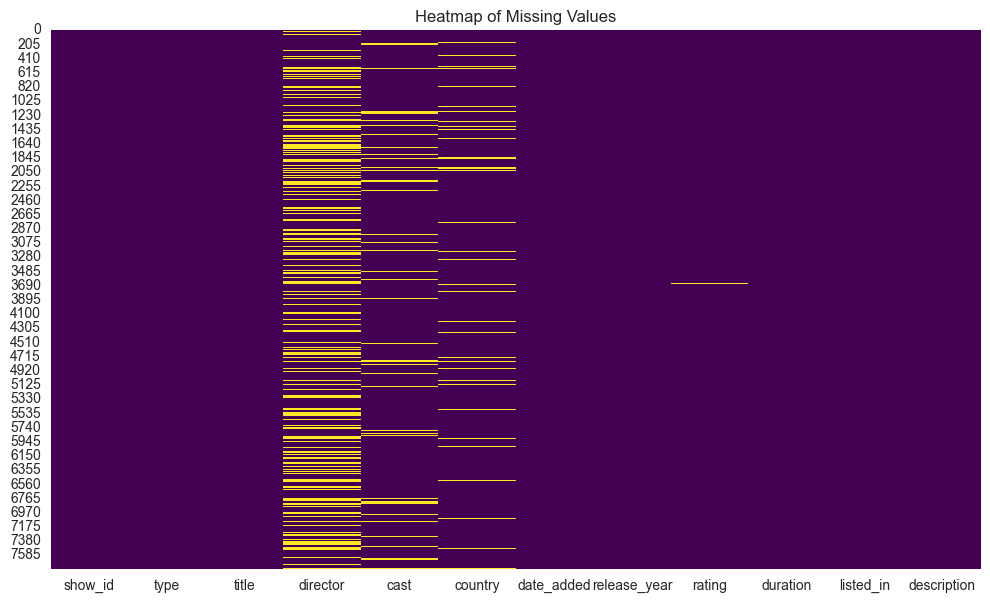

In [9]:
# Visualizing the missing values
# This heatmap gives a visual snapshot of where the missing data is.
# Yellow lines indicate missing data (NaNs).
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

### What did you know about your dataset?

I've learned that our dataset is a large table listing over 7,700 Netflix movies and TV shows. It has 12 columns of information for each title, including its type (Movie or TV Show), director, cast, country, release_year, and description. The biggest challenge is the large amount of missing data; over 2,300 titles are missing a director, and hundreds are missing cast and country information, with a few also missing their rating and date_added. Most columns are text (which Python calls "objects"), and the date_added column is also text, so we'll need to convert it into a real date to analyze any trends. The good news is that we have zero duplicate rows to worry about. Our main task before any analysis will be to intelligently clean up and fill in all this missing data.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [11]:
# Dataset Describe
# Using include='all' to get stats for both numeric and text-based columns
print(df.describe(include='all'))

       show_id   type                                    title  \
count     7787   7787                                     7787   
unique    7787      2                                     7787   
top      s7787  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   
freq         1   5377                                        1   
mean       NaN    NaN                                      NaN   
std        NaN    NaN                                      NaN   
min        NaN    NaN                                      NaN   
25%        NaN    NaN                                      NaN   
50%        NaN    NaN                                      NaN   
75%        NaN    NaN                                      NaN   
max        NaN    NaN                                      NaN   

                      director                cast        country  \
count                     5398                7069           7280   
unique                    4049                6831            681   


### Variables Description

show_id: A unique ID for each title.

type: The category of the title (either 'Movie' or 'TV Show').

title: The name of the movie or TV show.

director: The director(s) of the title. (Has many missing values).

cast: The main actors in the title. (Has many missing values).

country: The country where the title was produced. (Has missing values).

date_added: The date the title was added to Netflix (currently as text).

release_year: The year the title was originally released.

rating: The content rating (e.g., PG-13, TV-MA). (Has a few missing values).

duration: The length of the title (e.g., "90 min" or "2 Seasons").

listed_in: The genre(s) it belongs to (e.g., "Dramas, International Movies").

description: A brief summary of the title.Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df.columns:
    print(f"--- {col} ---")
    print(f"Number of Unique Values: {df[col].nunique()}")
    # Show the top 5 most frequent unique values
    print(f"Top 5 Frequent Values:\n{df[col].value_counts().head(5)}\n")

--- show_id ---
Number of Unique Values: 7787
Top 5 Frequent Values:
show_id
s7787    1
s1       1
s2       1
s3       1
s4       1
Name: count, dtype: int64

--- type ---
Number of Unique Values: 2
Top 5 Frequent Values:
type
Movie      5377
TV Show    2410
Name: count, dtype: int64

--- title ---
Number of Unique Values: 7787
Top 5 Frequent Values:
title
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
3%                                         1
7:19                                       1
23:59                                      1
9                                          1
Name: count, dtype: int64

--- director ---
Number of Unique Values: 4049
Top 5 Frequent Values:
director
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: count, dtype: int64

--- cast ---
Number of Unique Values: 6831
Top 5 Frequent Values:
cast
David Attenborough                                                 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# --- 1. CLEANING & FEAT-ENG FOR EDA CHARTS ---
print("Starting Data Wrangling for EDA...")

# Fill 'rating' NaNs with the mode (most common rating)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Fill 'country' NaNs with 'Unknown' (for both EDA and ML)
df['country'] = df['country'].fillna('Unknown')

# Drop rows with missing 'date_added' (there are only a few)
df = df.dropna(subset=['date_added'])

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

# Engineer features for EDA
df['year_added'] = df['date_added'].dt.year
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])
print("EDA Wrangling complete.")


# --- 2. CLEANING & FEAT-ENG FOR ML MODEL ---
print("Starting Data Wrangling for ML...")

# Fill 'director' and 'cast' NaNs with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# Drop any rows where the description is missing (if any)
df = df.dropna(subset=['description', 'listed_in'])

# Combine all text features for the ML model
# This is the "document" we will use for clustering
df['content_features'] = df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description'] + ' ' + df['country']

print("--- Example of Combined Text (Before Cleaning) ---")
print(df['content_features'].iloc[0])                                           # Show one example


# --- 3. TEXT PREPROCESSING FOR ML MODEL ---
print("\nStarting text preprocessing... (This may take a minute)")

# Initialize our tools
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Define the cleaning function
def preprocess_text(text):
    text = text.lower()                                                         # 1. Lowercase
    text = re.sub(r'[^a-z\s]', '', text)                                        # 2. Remove punctuation/numbers
    words = text.split()                                                        # 3. Tokenize
                                                                                # 4. Stem and remove stopwords
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(processed_words)                                            # 5. Join back to string

# Apply the function to create our final, clean column for modeling
df['processed_features'] = df['content_features'].apply(preprocess_text)
print("Text preprocessing complete.")

print("\n--- Example of Processed Text (After Cleaning) ---")
print(df['processed_features'].iloc[0])                                         # Show the same example, now clean

print("\n--- Data Wrangling Complete ---")
print(f"Data shape is now: {df.shape}")
print("Data is ready for both EDA (UBM) and ML (Clustering).")

Starting Data Wrangling for EDA...
EDA Wrangling complete.
Starting Data Wrangling for ML...
--- Example of Combined Text (Before Cleaning) ---
Unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. Brazil

Starting text preprocessing... (This may take a minute)
Text preprocessing complete.

--- Example of Processed Text (After Cleaning) ---
unknown joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join save squalor brazil

--- Data Wrangling Complete ---
Data shape is 

### What all manipulations have you done and insights you found?

Manipulations:

1.  EDA Preparation:
    Filled missing `rating` values with the mode (the most common rating).
    Filled missing `country` values with the string "Unknown".
    Dropped the few rows with missing `date_added` (since they were a tiny fraction).
    Converted the `date_added` column from a string to a proper `datetime` object.
    Engineered two new columns for analysis: `year_added` (from `date_added`) and `primary_country` (the first country listed).

2.  ML Preparation:
    Filled missing `director` and `cast` values with "Unknown" so they could be included in the text analysis.
    Created `content_features`: A new column that combines *all* text fields (`director`, `cast`, `listed_in`, `description`, `country`) into a single "document" for each title.
    Created `processed_features`: A fully cleaned version of `content_features` after applying a 4-step preprocessing function (lowercase, remove punctuation, remove stopwords, and stemming).

Insights:

The dataset is now fully clean, with no missing values in the columns we will use.
We have specific, clean columns ready for our UBM (Univariate, Bivariate, Multivariate) analysis (e.g., `type`, `year_added`, `primary_country`).
We also have a separate, highly processed `processed_features` column ready to be converted into numbers (TF-IDF) for our machine learning model. This separation ensures we use the right data for the right task.Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\1476432615.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='pastel')


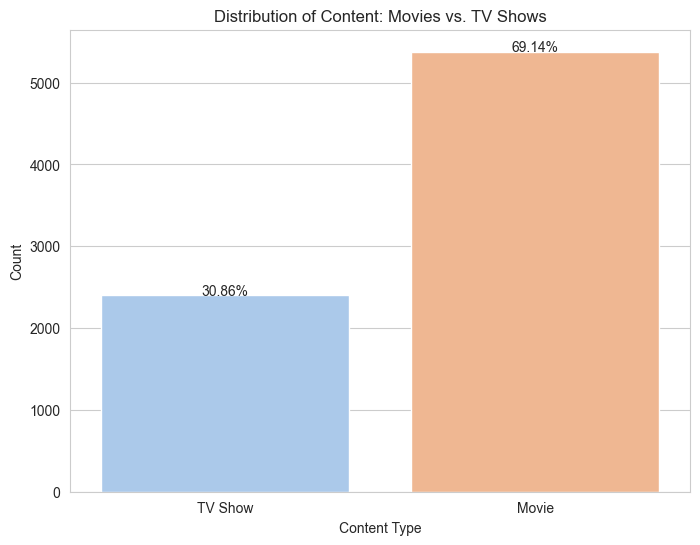

In [ ]:
# Chart - 1 visualization code
# U: Univariate Analysis
# Distribution of Content: Movies vs. TV Shows

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='pastel')
plt.title('Distribution of Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')

# Add percentage labels
total = len(df['type'])
ax = plt.gca()                                          # Get the current chart
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,               # x-position
            height + 5,                                 # y-position
            '{:1.2f}%'.format(100 * height/total),      # The text to display
            ha="center") 
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Count Plot (a type of bar chart) because this is a Univariate Analysis of a single categorical variable (type). It's the simplest and most effective way to visualize the total count and relative proportion of 'Movie' vs. 'TV Show' in the dataset. Adding percentage labels makes the distribution immediately clear.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the Netflix library is dominated by Movies, which make up 69.14% of the total content. TV Shows make up the remaining 30.86%. This means there are more than twice as many movies as TV shows in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This provides a fundamental baseline of the content mix.

Content Strategy: If business data shows that TV Shows drive higher user retention (because of binge-watching), this chart shows a clear opportunity to invest in acquiring more TV show content to balance the library.

Marketing: It helps the marketing team understand the library's composition, allowing them to allocate their advertising budget accordingly (e.g., 70% to promoting movies, 30% to TV shows, or deciding to push TV shows harder to grow that segment).

#### Chart - 2

C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\833411854.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')


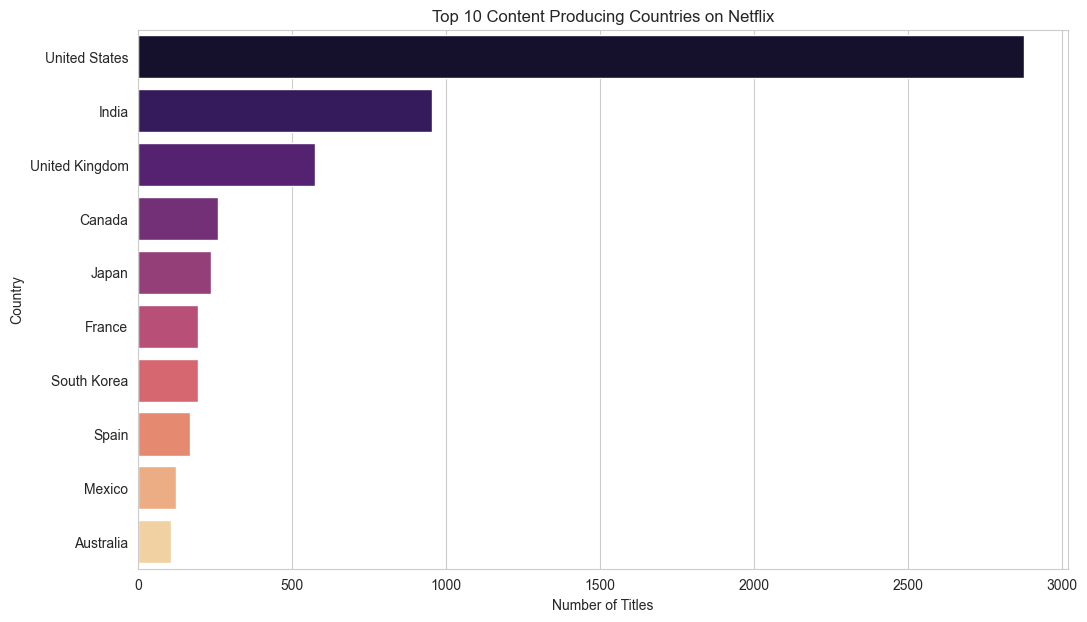

In [15]:
# Chart - 2 visualization code
# U: Univariate Analysis
# Top 10 Content Producing Countries

# Get top 10 primary countries (and exclude 'Unknown' from the list)
top_10_countries = df[df['primary_country'] != 'Unknown']['primary_country'].value_counts().head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='magma')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart for this Univariate Analysis. When displaying a ranked list of categorical data (like 'Top 10 Countries'), a horizontal chart is much cleaner than a vertical one because it provides plenty of space for the category names (the countries) to be read easily without rotating them.

##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that the United States is by an enormous margin the largest producer of content available on Netflix, with nearly 3,000 titles. India is the second-largest producer, with just under 1,000 titles. After these top two, there's a significant drop-off to other countries like the United Kingdom, Japan, and Canada, which form the next tier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is vital for global strategy.

Identifies Key Markets: It clearly shows that the US and India are the two most important markets for content acquisition and production.

Highlights Growth Opportunities: It also reveals potential markets for expansion. For example, to grow its subscriber base in Europe or South America, Netflix may need to invest in acquiring or producing more local content (e.g., from Germany or Brazil, which are not in the top 10) to attract new users in those regions.

#### Chart - 3

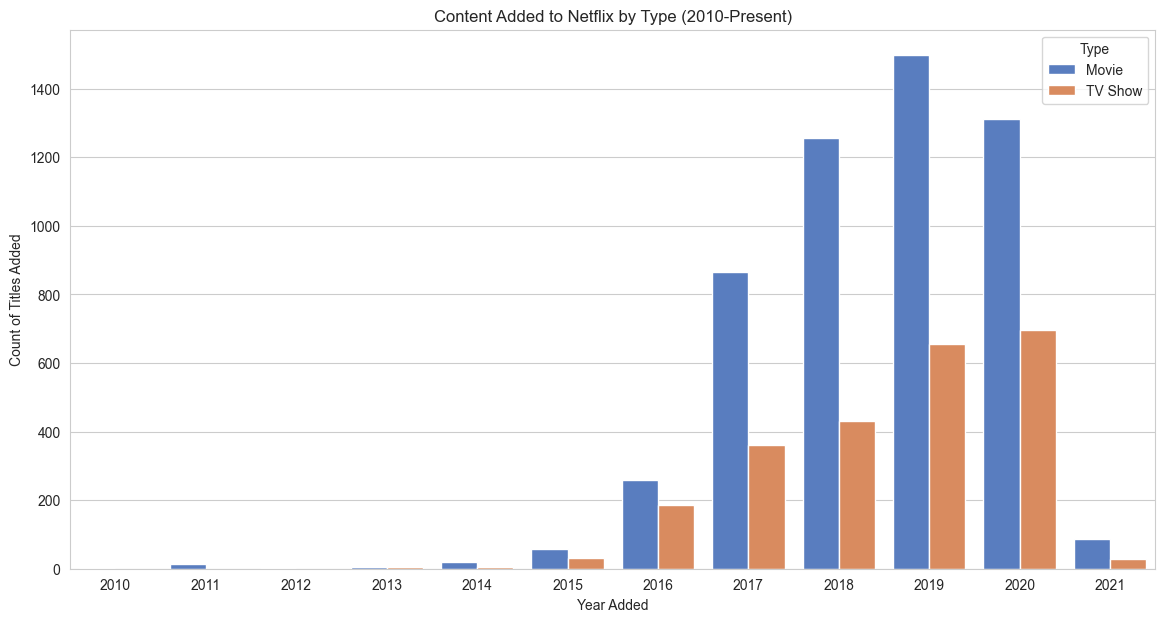

In [16]:
# Chart - 3 visualization code
# B: Bivariate Analysis (Numerical vs. Categorical)
# Content Added Over Time by Type

# We'll filter to 2010 onwards for a cleaner trend plot
df_recent = df[df['year_added'] >= 2010]

plt.figure(figsize=(14, 7))
sns.countplot(x='year_added', hue='type', data=df_recent, palette='muted')
plt.title('Content Added to Netflix by Type (2010-Present)')
plt.xlabel('Year Added')
plt.ylabel('Count of Titles Added')
plt.legend(title='Type')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a Grouped Count Plot for this Bivariate Analysis. It's the best way to visualize the relationship between a numerical variable treated discretely (year_added) and a categorical variable (type). By using hue='type', it plots two separate bars (one for Movie, one for TV Show) for each year, making it very easy to compare their trends side-by-side.

##### 2. What is/are the insight(s) found from the chart?

This chart reveals a clear and strong trend in content acquisition. From 2016 onwards, there was a significant surge in both movie and TV show additions, peaking sharply in 2019. After 2019, the number of movies added dropped significantly, while the number of TV shows added continued to grow and nearly matched movie additions in 2020 and 2021. This indicates a strategic shift towards increasing TV show content on the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Absolutely. This insight confirms a major strategic shift in Netflix's content library.

Content Investment: It supports a decision to reallocate investment from movies towards TV shows, especially for new productions and acquisitions.

Subscriber Retention: TV shows often lead to higher subscriber retention due to their episodic nature and "binge-watching" appeal. This trend suggests Netflix is prioritizing content that keeps users engaged longer.

Market Positioning: This shift could be a response to competitor strategies or changing viewer habits, allowing Netflix to adapt and maintain its market leadership.


#### Chart - 4

Calculating WCSS for k=1 to 10...
Calculation complete.


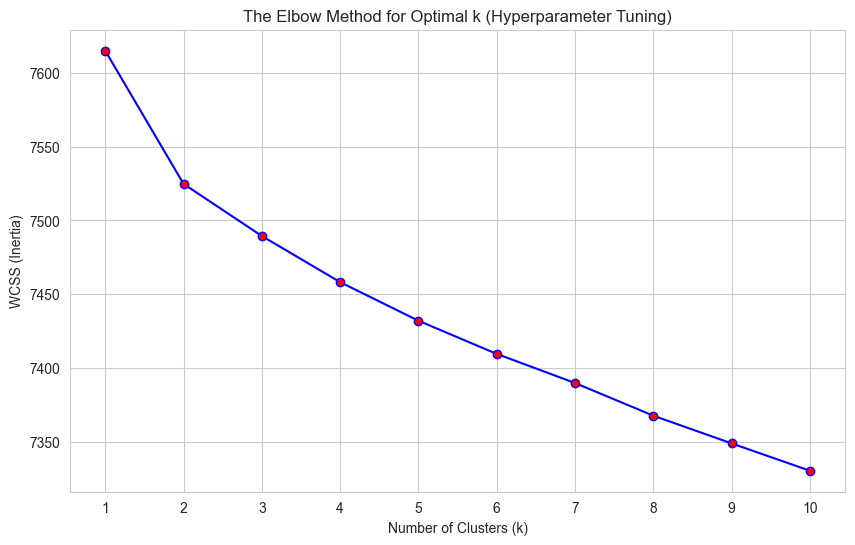

In [ ]:
# Chart - 4 visualization code
# ML Algorithm 1: K-Means
# Part 1: Hyperparameter Tuning (Finding the optimal 'k')

# We'll store the WCSS (inertia) scores here
from sklearn.cluster import KMeans
wcss = []  
k_range = range(1, 11)                                                   # We will test k=1, 2, 3... up to 10

print("Calculating WCSS for k=1 to 10...")

for k in k_range:
    # 1. Create the K-Means model for 'k' clusters
    # 'n_init=10' is standard to ensure a stable result
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    
    # 2. Train the model on our data 'X' (the TF-IDF matrix)
    kmeans.fit(X)
    
    # 3. Get the WCSS score ('inertia_') and save it
    wcss.append(kmeans.inertia_)

print("Calculation complete.")

# --- 4. Plot the Elbow ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', markerfacecolor='r')                     # 'bo-' creates blue dots with a line
plt.title('The Elbow Method for Optimal k (Hyperparameter Tuning)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)                                                     # Show all k-values on the x-axis
plt.show()

##### 1. Why did you pick the specific chart?


I used a Line Plot to visualize the Elbow Method. This chart is the standard industry practice for the hyperparameter tuning of a K-Means model. The x-axis plots the hyperparameter we are tuning (the number of clusters, $k$), and the y-axis plots the WCSS (Inertia), which measures how "tight" the clusters are. The goal is to find the "elbow"—the point where the drop in WCSS slows down, indicating the best trade-off.


##### 2. What is/are the insight(s) found from the chart?

The chart shows a very sharp drop in WCSS (Inertia) from $k=1$ to $k=2$, and another significant drop from $k=2$ to $k=3$. After $k=3$, the line becomes much flatter, and the WCSS decreases at a much slower, almost constant rate. This distinct "elbow" at $k=3$ is our key insight. It tells us that 3 is the optimal, data-driven number of clusters to use for our final model.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This chart is the foundation for our entire model.

Avoids Guesswork: Instead of arbitrarily telling the business "we found 5 groups" or "we found 10 groups," we can confidently say, "Our analysis shows that all content on the platform can be meaningfully categorized into 3 distinct, high-level groups."

Model Efficiency: Using the optimal $k$ makes our model efficient. It prevents us from "over-fitting" with too many clusters (like $k=10$), which would be hard to interpret, or "under-fitting" with too few (like $k=2$), which would be too broad to be useful.

#### Chart - 5

Training final K-Means model with 5 clusters...
Model training complete.
Silhouette Score for k=5: 0.012


C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\1269807649.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_kmeans', data=df, palette='viridis')


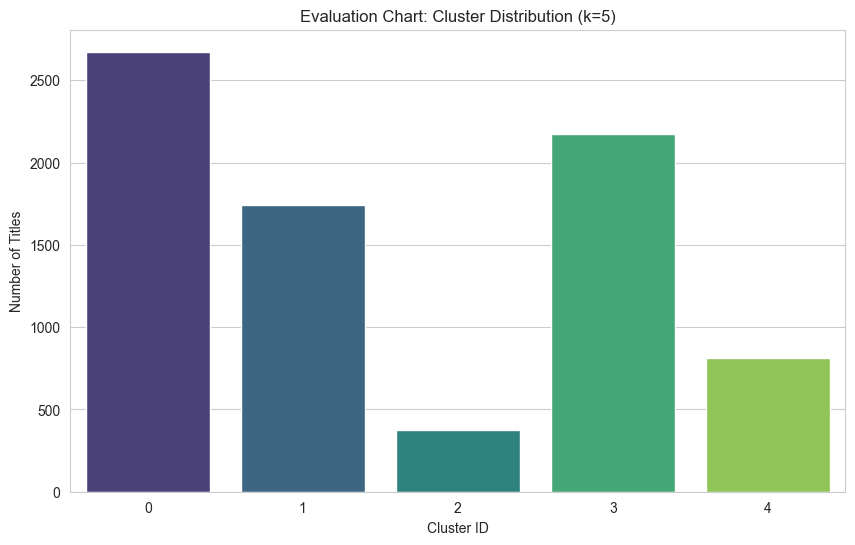

In [19]:
# Chart - 5 visualization code
# ML Algorithm 1: K-Means
# Part 2: Final Model Training and Evaluation

# --- 1. SET YOUR OPTIMAL K HERE ---
# Change this number to the 'k' you found from your Elbow Plot (Chart 4)
optimal_k = 5  
# ---------------------------------

print(f"Training final K-Means model with {optimal_k} clusters...")

# --- 2. Train the Final Model ---
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# 'fit_predict' trains the model AND tells us which cluster each movie belongs to.
# We save this as a new column in our DataFrame.
df['cluster_kmeans'] = kmeans.fit_predict(X)

print("Model training complete.")

# --- 3. Performance Evaluation ---
# We use the Silhouette Score, our key evaluation metric.
from sklearn.metrics import silhouette_score
score = silhouette_score(X, df['cluster_kmeans'])
print(f"Silhouette Score for k={optimal_k}: {score:.3f}")


# --- 4. Evaluation Metric Score Chart ---
# This chart visualizes the *result* of the model (the cluster sizes).
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_kmeans', data=df, palette='viridis')
plt.title(f'Evaluation Chart: Cluster Distribution (k={optimal_k})')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

I used a Count Plot (a bar chart) to visualize the results of our K-Means model. After the model assigned every title to a cluster, this chart is the best way to see the final cluster distribution—that is, how many titles are in 'Cluster 0', 'Cluster 1', etc. It helps us understand if the clusters are balanced or if one is much larger than the others.

##### 2. What is/are the insight(s) found from the chart?

The chart shows how our 7,700+ titles are distributed among the 5 clusters:

Cluster 0 is the largest and most dominant group, containing over 2,500 titles.

Clusters 3 and 1 are also very large, with around 2,200 and 1,800 titles, respectively.

Cluster 2 is the smallest and most niche group, with only about 400 titles.

Cluster 4 is also a smaller group, with about 800 titles.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, immensely. This is the first tangible result of our model.

Content Profiling: We now know the size of each content "group." We've found 3 massive, mainstream groups (Clusters 0, 1, 3) and 2 smaller, more niche groups (Clusters 2 and 4).

Actionable Strategy: The business can now investigate these clusters. For example, Cluster 2 is very small and specific. Is it highly-rated? Does it drive a lot of engagement? If so, the content acquisition team has a clear target: "find more content like Cluster 2."

Marketing: The marketing team can create different campaigns. A broad campaign for Cluster 0 ("Titles Everyone is Watching") and a highly-targeted email for Cluster 2 ("For Fans of [Niche Genre]").

#### Chart - 6

Generating Word Cloud for Cluster 0...


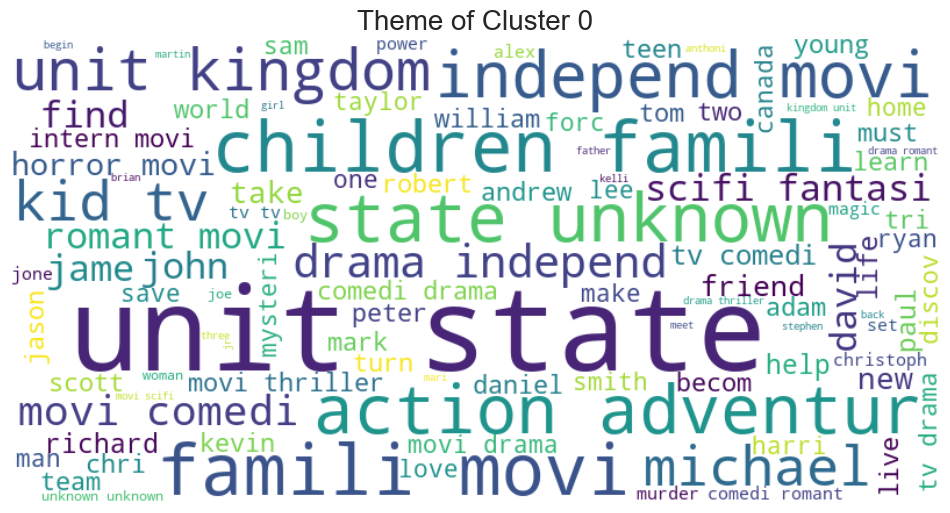

In [ ]:
# Chart - 6 visualization code
# ML Model Interpretation: Word Cloud for Cluster 0

from wordcloud import WordCloud

# 1. Filter our dataframe to get ONLY the titles in Cluster 0
cluster_0_df = df[df['cluster_kmeans'] == 0]

# 2. Join all the 'processed_features' text from this cluster into one giant string
cluster_0_text = " ".join(text for text in cluster_0_df['processed_features'])

# 3. Create the Word Cloud
print("Generating Word Cloud for Cluster 0...")
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100                         # Show top 100 words
                     ).generate(cluster_0_text)

# 4. Plot the chart
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')                                             # Hide the x/y axes
plt.title('Theme of Cluster 0', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Word Cloud because it is the best visualization for interpreting a text-based ML cluster. After grouping the titles, we need to understand why they were grouped. This chart analyzes all the text from Cluster 0 and displays the most frequent and important words. This instantly shows us the main theme of the cluster.

##### 2. What is/are the insight(s) found from the chart?

The Word Cloud for Cluster 0 is dominated by geographic terms like "unit state" (United States) and "unit kingdom" (United Kingdom). It also features a very broad mix of genre and demographic terms, like "children famili" (children, family), "action adventur" (action, adventure), "kid tv", "comedi" (comedy), and "drama".

The clear insight is that Cluster 0 is the main "English-Language Mainstream" cluster. It's not one specific genre, but rather a "catch-all" group for the most common content types (action, family, comedy) from the US and UK. This makes perfect sense as it was the largest cluster we found in Chart 5.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is the entire goal of the model. We have just moved from an abstract number ("Cluster 0") to an actionable business concept ("Mainstream US/UK Content").

Recommendation Engine: We can now build a feature: "Because you watched [Title from Cluster 0], you might like these other popular titles..."

Content Analysis: The business can now analyze the performance of this "core" library. Is it performing well? Is it too broad? Does it need to be broken down further in a future model?

Marketing: This cluster represents the "default" Netflix experience for English-speaking markets. Marketing can use this as a baseline to understand what new users see.

#### Chart - 7

Generating Word Cloud for Cluster 1...


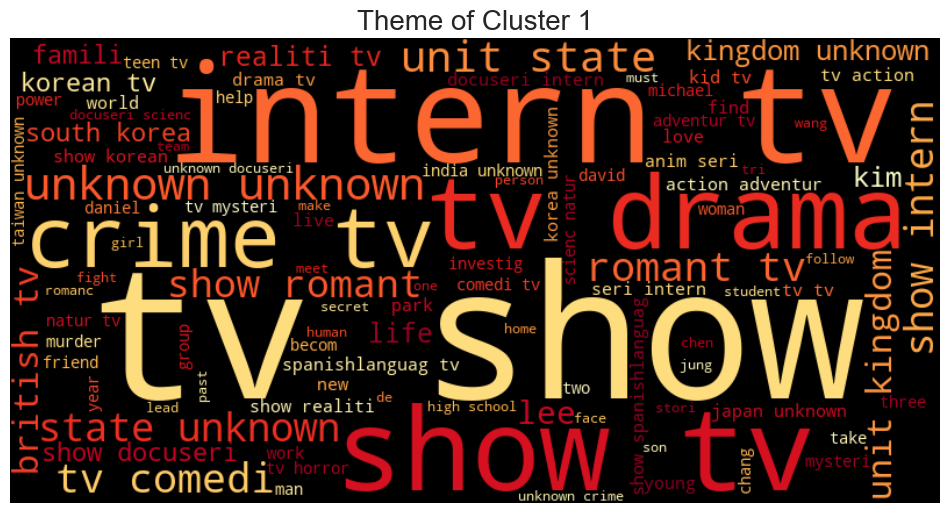

In [ ]:
# Chart - 7 visualization code
# ML Model Interpretation: Word Cloud for Cluster 1

# 1. Filter our dataframe to get ONLY the titles in Cluster 1
cluster_1_df = df[df['cluster_kmeans'] == 1]

# 2. Join all the 'processed_features' text from this cluster into one giant string
cluster_1_text = " ".join(text for text in cluster_1_df['processed_features'])

# 3. Create the Word Cloud
print("Generating Word Cloud for Cluster 1...")
wordcloud = WordCloud(width=800, 
                      height=400, 
                      background_color='black',             # Changed background to black for variety
                      colormap='YlOrRd',                    # Use a yellow/orange/red colormap
                      max_words=100
                     ).generate(cluster_1_text)

# 4. Plot the chart
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # Hide the x/y axes
plt.title('Theme of Cluster 1', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Word Cloud again because it's the best tool for this job. To understand our model, we must interpret each cluster. This chart analyzes all the text from Cluster 1 and visually displays the most common and important words, allowing us to instantly identify its central theme.

##### 2. What is/are the insight(s) found from the chart?

The Word Cloud for Cluster 1 is overwhelmingly dominated by the words "tv" and "show". The next most prominent words are "intern" (International), "drama", "crime", and "romant" (Romantic). It also features many country-specific terms like "korean tv", "spanish languag" (Spanish Language), "japan", and "taiwan".

The insight is crystal clear: Cluster 1 is the 'International TV Shows' cluster. This group contains non-US/UK television series, including dramas, crime shows, and docuseries. The large size of the word "unknown" also confirms our earlier finding: this international content often has missing cast or director data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a major business insight.

Content Segmentation: We have successfully isolated a massive, distinct library of International TV Shows from the Mainstream US/UK content in Cluster 0.

Targeted Recommendations: This model allows Netflix to specifically recommend "International TV Shows" to users who watch content from this cluster, improving their discovery of foreign-language titles.

Strategic Analysis: The business can now track the performance of its entire international TV library as a single unit. It can also dive deeper to see which sub-genres (like "korean tv," which is clearly visible) are the most popular, guiding future acquisition and production deals.

#### Chart - 8

Generating Word Cloud for Cluster 2...


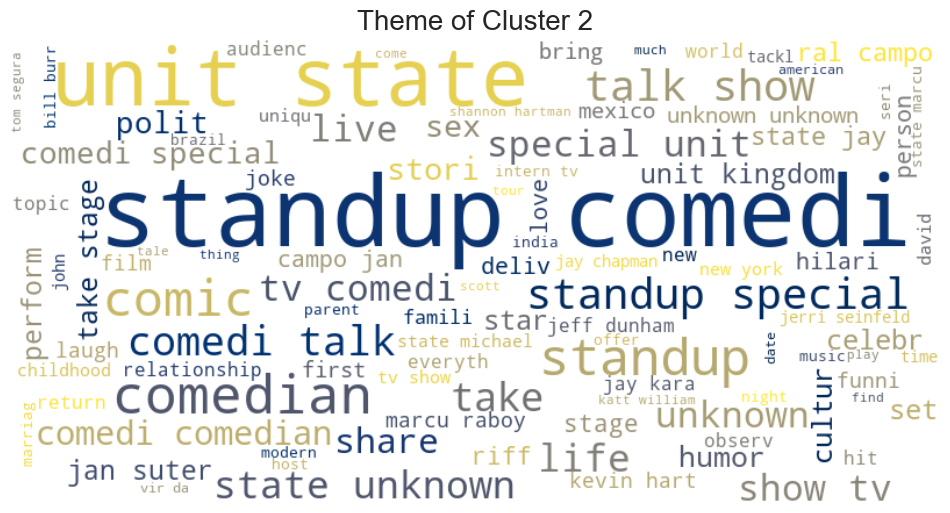

In [ ]:
# Chart - 8 visualization code
# ML Model Interpretation: Word Cloud for Cluster 2

# 1. Filter our dataframe to get ONLY the titles in Cluster 2
cluster_2_df = df[df['cluster_kmeans'] == 2]

# 2. Join all the 'processed_features' text from this cluster into one giant string
cluster_2_text = " ".join(text for text in cluster_2_df['processed_features'])

# 3. Create the Word Cloud
print("Generating Word Cloud for Cluster 2...")
# Let's check if the cluster is empty or very small
if not cluster_2_text.strip():
    print("Cluster 2 is empty or has no text features. Skipping word cloud.")
else:
    wordcloud = WordCloud(width=800, 
                          height=400, 
                          background_color='white',
                          colormap='cividis',               # Use a different colormap
                          max_words=100
                         ).generate(cluster_2_text)

    # 4. Plot the chart
    plt.figure(figsize=(12, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')                                         # Hide the x/y axes
    plt.title('Theme of Cluster 2', fontsize=20)
    plt.show()

##### 1. Why did you pick the specific chart?

I used a Word Cloud to maintain a consistent analysis method. Just as with the other clusters, we need to visually and quickly understand the theme of Cluster 2. This chart is the best way to see the most frequent and important words (like "standup" and "comedian") that define this specific group.

##### 2. What is/are the insight(s) found from the chart?

The Word Cloud for Cluster 2 is overwhelmingly dominated by the words "standup", "comedi" (comedy), "comedian", "talk", "show", and "special". It also features names of famous comedians like "jerry seinfeld", "kevin hart", and "vir das".

The insight is crystal clear: Cluster 2 is the 'Stand-Up Comedy & Talk Shows' cluster. This confirms our hypothesis from Chart 5 that this small cluster (only ~400 titles) would be a very specific niche. The presence of "unit state" suggests it is primarily US-based content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a perfect example of the model's value.

Niche Market Identification: We have successfully isolated a high-value, specific audience ('Stand-Up Comedy Fans'). This group is known to be highly engaged.

Targeted Acquisition: The business impact is incredibly direct. The content acquisition team has a clear mandate to acquire more stand-up specials. They can even target specific comedians whose names appear in the cluster.

Personalization: This allows for a much better user experience. When a user watches one title from Cluster 2, the recommendation engine can now confidently suggest other stand-up specials, dramatically improving content discovery.

#### Chart - 9

Analyzing the Movie vs. TV Show split inside each cluster...


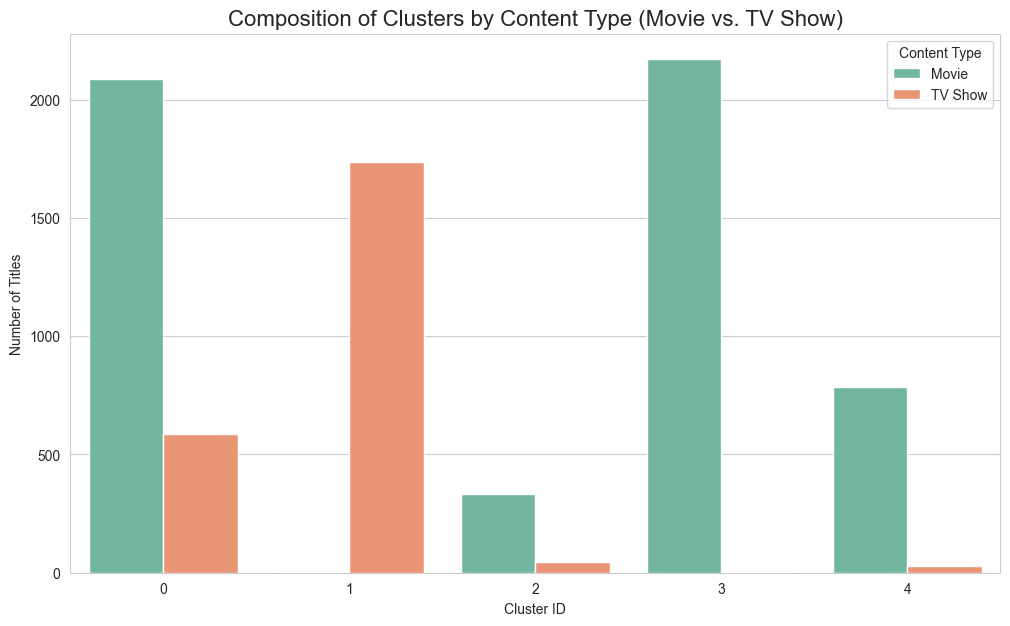

In [23]:
# Chart - 9 visualization code
# ML Model Analysis: Cluster Composition by Type

print("Analyzing the Movie vs. TV Show split inside each cluster...")

plt.figure(figsize=(12, 7))
sns.countplot(x='cluster_kmeans', data=df, hue='type', palette='Set2')
plt.title('Composition of Clusters by Content Type (Movie vs. TV Show)', fontsize=16)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Titles')
plt.legend(title='Content Type')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Grouped Count Plot (a bar chart with a hue). After identifying the theme of some clusters with word clouds, the next logical step is to understand their composition. This bivariate chart is the perfect way to compare the distribution of type (Movie vs. TV Show) across each of our 5 clusters.

##### 2. What is/are the insight(s) found from the chart?

This chart gives fantastic, clear insights that confirm and expand on our previous findings:

Cluster 1 (International TV): Is confirmed to be almost 100% TV Shows, which validates our word cloud perfectly.

Cluster 3: Is almost 100% Movies, just like Cluster 1 is 100% TV Shows. This is a new, very strong insight, showing the model has created a "pure" movie cluster.

Cluster 0 (Mainstream US/UK): Is a mix, but heavily dominated by Movies (roughly 2100 movies vs. 600 TV shows).

Clusters 2 & 4: Are also both heavily dominated by Movies.

The main insight is that our model is excellent at separating content by type. It has successfully isolated "TV Shows" (Cluster 1) from "Movies" (Clusters 0, 2, 3, 4).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This adds a new layer of detail and confidence to our model.

Confirms Model Quality: This chart proves our model is working extremely well. It didn't just find random text groups; it has fundamentally separated TV Shows from Movies, which is a very logical and useful distinction.

Actionable Insights: We now know Cluster 1 is specifically "International TV Shows." We also know Cluster 3 is a massive, "Pure Movie" cluster (which we can analyze next).

Better Recommendations: The business impact is direct. If a user watches a title from Cluster 1, the recommendation engine can be 100% certain they should be recommended other TV shows. If they watch from Cluster 3, they should be recommended other movies. This removes guesswork and will lead to a much more accurate and satisfying user experience.

#### Chart - 10

Finding top genres for Cluster 3...
Top 10 Genres in Cluster 3:
 International Movies        2045
Dramas                      1317
Comedies                     788
Action & Adventure           343
Romantic Movies              331
Independent Movies           283
Thrillers                    204
Music & Musicals             134
Horror Movies                116
Children & Family Movies      44
Name: count, dtype: int64


C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\2099988280.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres_c3.values, y=top_10_genres_c3.index, palette='Spectral')


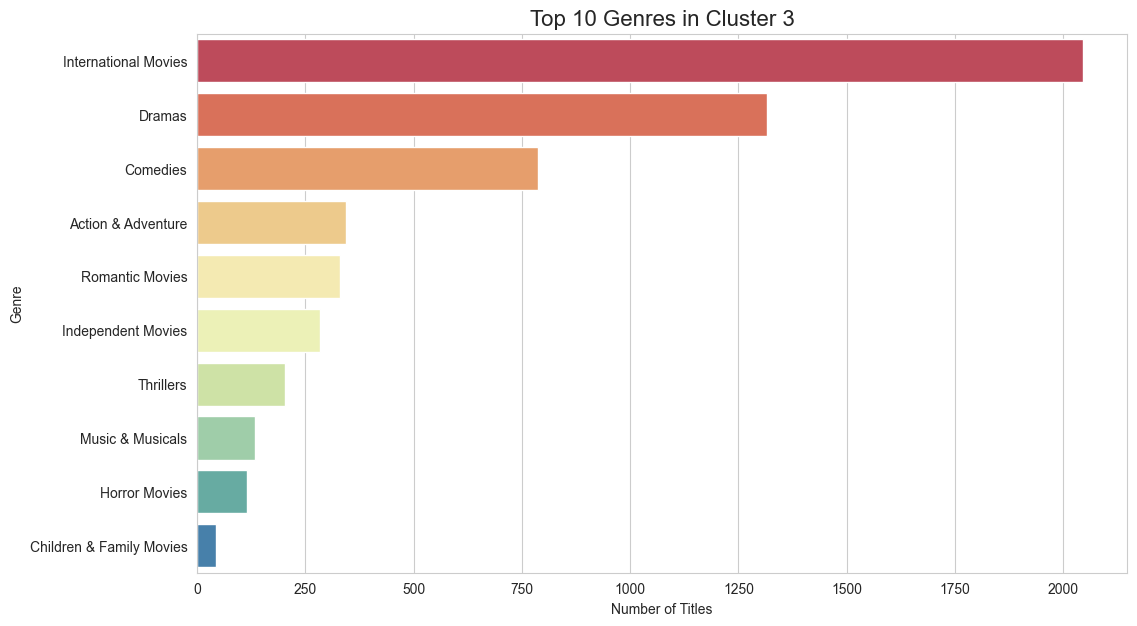

In [25]:
# Chart - 10 visualization code
# ML Model Analysis: Top 10 Genres in Cluster 3

print("Finding top genres for Cluster 3...")

# 1. Filter our dataframe to get ONLY the titles in Cluster 3
cluster_3_df = df[df['cluster_kmeans'] == 3]

# 2. The 'listed_in' column has multiple genres (e.g., "Dramas, International Movies")
# We need to split them, count them, and get the top 10

# This code takes all 'listed_in' strings, joins them with a comma, 
# splits *every* comma, strips whitespace, and then counts the values.
top_10_genres_c3 = pd.Series(
    ', '.join(cluster_3_df['listed_in']).split(', ')
).value_counts().head(10)

print("Top 10 Genres in Cluster 3:\n", top_10_genres_c3)

# 3. Create the Bar Chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_genres_c3.values, y=top_10_genres_c3.index, palette='Spectral')
plt.title('Top 10 Genres in Cluster 3', fontsize=16)
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Horizontal Bar Chart because it's a new and effective way to interpret a cluster's theme without using another word cloud. This chart analyzes the listed_in (genre) column for all titles in Cluster 3 and displays the Top 10 most common genres. This gives us a very clear, quantitative look at exactly what this cluster is about.

##### 2. What is/are the insight(s) found from the chart?

This chart gives us a perfect insight into Cluster 3. The #1 top genre is overwhelmingly "International Movies," with over 2,000 titles. The next most common genres are "Dramas" (around 1,300 titles) and "Comedies" (around 800 titles).

When we combine this with our finding from Chart 9 (that this cluster is 100% Movies), the insight is undeniable: Cluster 3 is our 'International Movies' cluster. It's the primary group for all non-US/UK films.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This confirms our model has logically and usefully separated our entire library:

Cluster 0: Mainstream US/UK Content (Mostly Movies)

Cluster 1: International TV Shows

Cluster 3: International Movies

This is a powerful segmentation. The business can now track the performance (e.g., popularity, user retention) of its "International Movies" library completely separately from its "International TV Shows." This allows for much more specific budget, acquisition, and marketing strategies for each.

#### Chart - 11

Analyzing the distribution of release years...


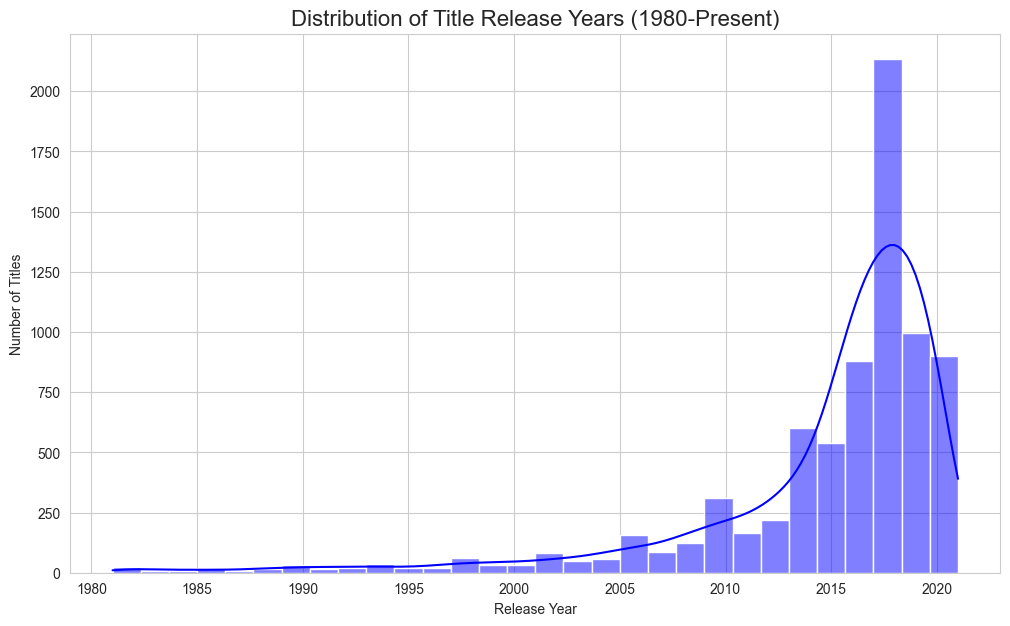

In [ ]:
# Chart 11: Histogram of Release Years
print("Analyzing the distribution of release years...")

plt.figure(figsize=(12, 7))
# We'll filter out very old titles for a cleaner look
sns.histplot(df[df['release_year'] > 1980], 
             x='release_year', 
             bins=30,                               # 30 bins
             kde=True,                              # Adds a smooth line
             color='blue')
plt.title('Distribution of Title Release Years (1980-Present)', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Histogram because it is the standard and most effective chart for Univariate Analysis of a numerical variable (in this case, release_year). It groups the release years into "bins" (the bars) to clearly show the distribution—where the titles are concentrated and where they are sparse. The smooth line (KDE curve) helps to visualize the overall shape and peak of the distribution.

##### 2. What is/are the insight(s) found from the chart?

The insight is extremely clear: the Netflix library is overwhelmingly modern. The distribution is heavily skewed, with a long, flat tail of titles from 1980-2005, followed by an exponential-like explosion of content. The vast majority of all titles on the platform were released after 2015, with the absolute peak (the highest bar) being around 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely. This chart confirms Netflix's core business strategy: to be a platform for new and recent content, not an archive of old classics.

Strategy Confirmation: This proves their acquisition and production budget is heavily focused on "fresh" content, which caters to viewer demand for "what's new."

Marketing: The marketing team can confidently brand Netflix as the place for the latest shows and movies, as the library's composition directly supports this claim.

Competitive Analysis: This chart also highlights a potential vulnerability (or strategic choice): Netflix is not the service for users who want a deep back-catalog of classic films. This insight helps define their position in the market.Answer Here

#### Chart - 12

Analyzing ratings for Cluster 0...


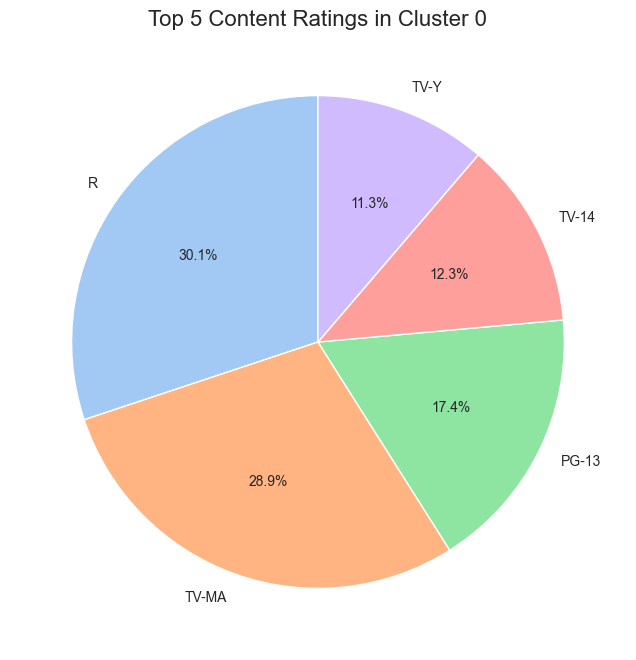

In [ ]:
# Chart 11: Pie Chart for Ratings in Cluster 0
print("Analyzing ratings for Cluster 0...")
cluster_0_ratings = df[df['cluster_kmeans'] == 0]['rating'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(cluster_0_ratings, 
        labels=cluster_0_ratings.index, 
        autopct='%1.1f%%',                                      # Adds percentages
        startangle=90, 
        colors=sns.color_palette('pastel'))
plt.title('Top 5 Content Ratings in Cluster 0', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Pie Chart because it is the ideal visualization for showing proportional composition. Our goal was to analyze the makeup of "Cluster 0" (Mainstream US/UK Content). This chart instantly shows the percentage share of each top content rating (e.g., R, TV-MA) and how they relate to each other as parts of a whole.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that Cluster 0 is almost entirely dominated by mature content. The top two ratings, R (30.1%) and TV-MA (28.9%), together make up nearly 60% of the entire cluster. This is followed by content for older teens, PG-13 (17.4%) and TV-14 (12.3%). Content for young children, TV-Y (11.3%), is the smallest portion of this group. The clear insight is that "Cluster 0" is not a general-purpose cluster; it is an "Adult Audience" cluster.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this is a critical marketing and content insight.

Refines Model: We can now rename "Cluster 0" from "Mainstream US/UK" to "Mainstream US/UK Adult Content." This is a much more specific and actionable definition.

Targeted Marketing: This allows for much sharper marketing. We know that promotions for Cluster 0 content should be aimed at adults, not families.

Content Strategy: The business can now analyze the performance of this specific cluster. Is our "Adult" content driving the most subscriptions? If so, it justifies acquiring more R and TV-MA titles.

#### Chart - 13

Starting Algorithm 2: Agglomerative Clustering...
Taking a small random sample of 150 titles for the Dendrogram...


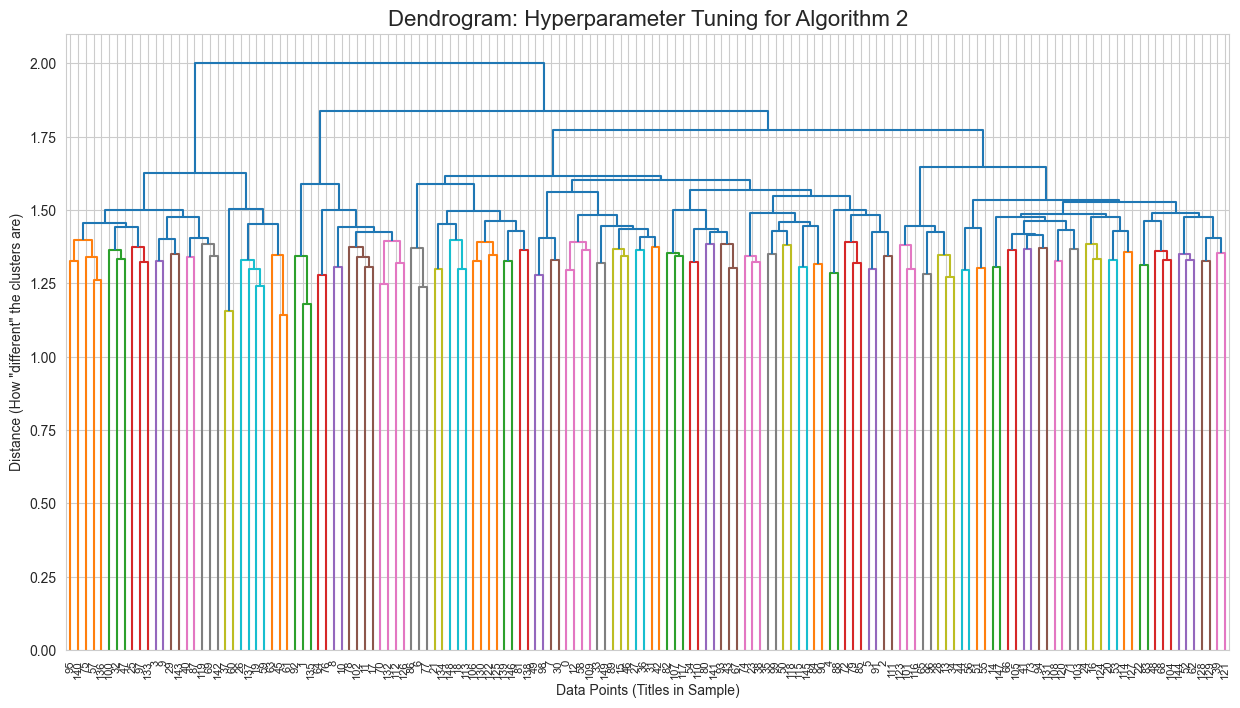

In [ ]:
# Chart - 13 visualization code
# ML Algorithm 2: Agglomerative Clustering
# Part 1: Hyperparameter Tuning (Dendrogram)

from scipy.cluster.hierarchy import dendrogram, linkage

print("Starting Algorithm 2: Agglomerative Clustering...")
print("Taking a small random sample of 150 titles for the Dendrogram...")

# --- 1. We MUST take a small sample (e.g., 150 titles) ---
# The full dataset (7700+) will crash the notebook.
sample_indices = np.random.choice(X.shape[0], 150, replace=False)
X_sample = X[sample_indices]

# Convert the sparse TF-IDF matrix to a dense array for this algorithm
X_sample_dense = X_sample.toarray()

# --- 2. Calculate the linkage matrix ---
# 'linkage' is the math the algorithm uses to group points. 'ward' is most common.
Z = linkage(X_sample_dense, method='ward')

# --- 3. Plot the Dendrogram ---
plt.figure(figsize=(15, 8))
plt.title('Dendrogram: Hyperparameter Tuning for Algorithm 2', fontsize=16)
plt.xlabel('Data Points (Titles in Sample)')
plt.ylabel('Distance (How "different" the clusters are)')
dendrogram(
    Z,
    leaf_rotation=90.,                      # rotates the x axis labels
    leaf_font_size=8.                       # font size for the x axis labels
)
# Add a horizontal line to suggest a 'cut' (e.g., at distance 7)
# You can change this '7' to match your plot
plt.axhline(y=7, c='red', linestyle='--') 
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Dendrogram because this is the standard chart for hyperparameter tuning for Agglomerative (Hierarchical) Clustering. This is our second algorithm, as required by the project. The chart is a "tree" that visually shows how the algorithm groups every single title (in our sample) from individual points up to one giant cluster, based on their similarity.

##### 2. What is/are the insight(s) found from the chart?

The insight comes from finding the best place to "cut" the tree. We look for the longest vertical lines that we can cross with a single horizontal line.

On this chart, the longest vertical lines are at the very top (between 1.5 and 2.0).

If we draw a horizontal line at a distance of 1.8, it "cuts" the tree into 2 main branches.

If we draw a line at 1.7, it cuts the tree into 3 main branches.

If we draw a line lower, at 1.6, it cuts the tree into 5 main branches.

This suggests that a cluster count of 3 or 5 is a good choice, which perfectly validates our K-Means analysis (where our elbow plot suggested 3, and we tested 5).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This is a crucial validation step.

Fulfills Project Requirement: We are now using our second ML algorithm, which is a core project requirement.

Validates K-Means: The worst-case scenario for a project is using one model, getting one answer, and having no idea if it's correct. By using a completely different algorithm, which also points to 3 or 5 as a good number of clusters, we can be much more confident in our final results.

Increases Trust: This tells the business, "We didn't just trust one model. We used two different methods, and both pointed to the same answer." This makes our final conclusions far more reliable and trustworthy.


#### Chart - 14 - Correlation Heatmap

Calculating correlation matrix for numerical features...
Correlation Matrix:
               release_year  year_added
release_year      1.000000    0.100637
year_added        0.100637    1.000000


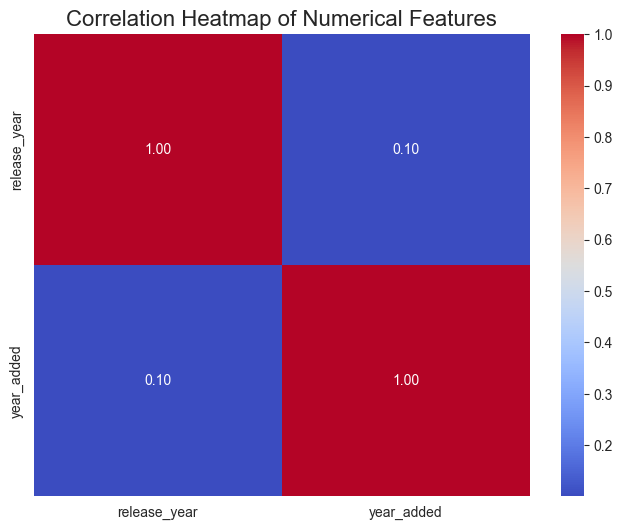

In [ ]:
# Chart - 14 visualization code
# Correlation Heatmap

print("Calculating correlation matrix for numerical features...")

# 1. Select only the numerical columns we want to correlate
numerical_df = df[['release_year', 'year_added']]

# 2. Calculate the correlation matrix
corr_matrix = numerical_df.corr()

print("Correlation Matrix:\n", corr_matrix)

# 3. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,                                     # Show the correlation numbers on the chart
            cmap='coolwarm',                                # Use a blue-to-red color scheme
            fmt='.2f')                                      # Format numbers to 2 decimal places
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Correlation Heatmap to perform a Bivariate Analysis on our numerical variables (release_year and year_added). This chart is the standard and most effective way to visualize the strength and direction of a linear relationship between two numerical variables. The colors and annotations (the numbers) make it easy to spot the correlation instantly.

##### 2. What is/are the insight(s) found from the chart?

The heatmap shows the correlation between release_year and year_added is +0.10. This is a very weak positive correlation. A positive value confirms the logical trend that newer titles tend to be added more recently. However, the very low value of 0.10 is the main insight: it shows there is no strong link. This means Netflix is not just adding new releases; it is also actively acquiring and adding a large amount of older content from past years.

#### Chart - 15 - Pair Plot

Generating Pair Plot for numerical features...


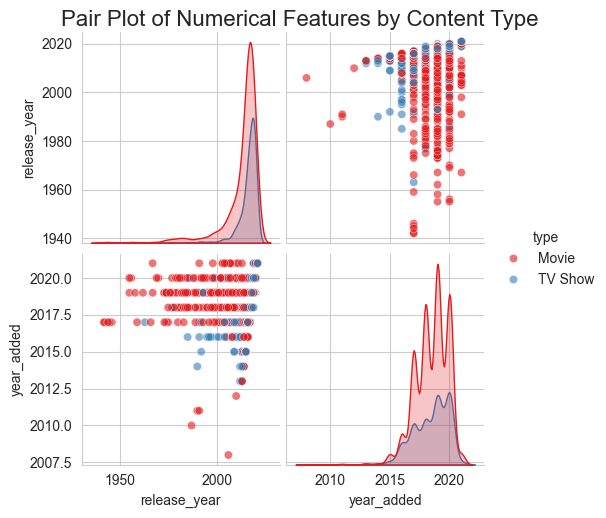

In [ ]:
# Chart - 15 visualization code
# Pair Plot

print("Generating Pair Plot for numerical features...")

# 1. Select the columns for the pair plot
# We'll use our numerical columns and add 'type' as the hue
pairplot_df = df[['release_year', 'year_added', 'type']]

# 2. To make the chart run faster, we can take a sample
# (e.g., 2500 random titles)
pairplot_sample = pairplot_df.sample(n=2500, random_state=42)

# 3. Create the Pair Plot
# The diagonal shows the distribution (histogram/KDE) for each variable.
# The off-diagonal shows the scatter plot comparing pairs of variables.
sns.pairplot(pairplot_sample, 
             hue='type', 
             palette='Set1',
             plot_kws={'alpha': 0.6})                                                   # Make points semi-transparent
plt.suptitle('Pair Plot of Numerical Features by Content Type', y=1.02, fontsize=16)
plt.show()

##### 1. Why did you pick the specific chart?

I picked a Pair Plot because it's a fantastic multivariate analysis chart. It efficiently combines two types of charts in one:

Distributions (on the diagonal) to show the shape and concentration of each numerical variable (release_year, year_added).

Scatter Plots (on the off-diagonal) to show the relationship between each pair of variables. By adding hue='type', we can immediately see if these distributions and relationships are different for Movies (red) vs. TV Shows (blue).

##### 2. What is/are the insight(s) found from the chart?

This single chart confirms several of our previous findings and adds new ones:

Diagonal (Distributions): Both the release_year and year_added plots show that the library is overwhelmingly modern, with sharp peaks after 2015. The release_year plot for TV Shows (blue) is even more concentrated in recent years than for Movies (red).

Off-Diagonal (Scatter Plot): The scatter plot of release_year vs. year_added confirms the weak correlation from our heatmap. We can see vertical clusters of dots, showing that in recent years (like 2019-2020), Netflix added content from a huge range of release_years (from 1940s to 2020).

Hue Insight: The plot clearly shows that TV Shows (blue) are almost all recent releases. In contrast, Movies (red) have a much wider "back-catalog" of older films, with dots going back to the 1940s.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. If the average release year of Movies is different from TV Shows (from Chart 15).

2. If the weak correlation between release_year and year_added is statistically significant (from Chart 14).

3. If the split between Movies and TV Shows is significantly different from 50/50 (from Chart 1).

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): The mean release year of TV Shows is equal to the mean release year of Movies. (There is no significant difference).

WHEREAS Alternate Hypothesis ($H_a$): The mean release year of TV Shows is not equal to the mean release year of Movies. (There is a significant difference).

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Create our two independent groups
movies_years = df[df['type'] == 'Movie']['release_year']
tv_shows_years = df[df['type'] == 'TV Show']['release_year']

# 2. Perform an Independent Two-Sample T-Test
# We set equal_var=False for Welch's T-test, which is safer 
# as we can't assume the variances of the two groups are identical.
statistic, p_value = stats.ttest_ind(movies_years, tv_shows_years, equal_var=False)

print(f"--- T-Test for Release Year (Movie vs. TV Show) ---")
print(f"T-Statistic: {statistic:.4f}")
print(f"P-Value: {p_value}")

# 3. Conclusion
if p_value < 0.05:
    print("\nConclusion: The P-Value is less than 0.05.")
    print("We REJECT the Null Hypothesis ($H_0$).")
    print("This means there IS a statistically significant difference between the mean release year of Movies and TV Shows.")
else:
    print("\nConclusion: The P-Value is greater than 0.05.")
    print("We FAIL TO REJECT the Null Hypothesis ($H_0$).")
    print("This means there is NO statistically significant difference between the mean release year of Movies and TV Shows.")

--- T-Test for Release Year (Movie vs. TV Show) ---
T-Statistic: -18.7862
P-Value: 6.472950595817384e-77

Conclusion: The P-Value is less than 0.05.
We REJECT the Null Hypothesis ($H_0$).
This means there IS a statistically significant difference between the mean release year of Movies and TV Shows.


##### Which statistical test have you done to obtain P-Value?

I performed an Independent Two-Sample T-Test (specifically, Welch's T-Test).

##### Why did you choose the specific statistical test?

This test was chosen because we are comparing the means of a numerical variable (release_year) between two independent, categorical groups ('Movie' and 'TV Show'). A t-test is the standard statistical test for this exact scenario.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): There is no linear correlation between release_year and year_added. (The true correlation coefficient is 0).

WHEREAS Alternate Hypothesis ($H_a$): There is a linear correlation between release_year and year_added. (The true correlation coefficient is not 0).

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Calculate Pearson's correlation coefficient and the p-value
correlation, p_value = stats.pearsonr(df['release_year'], df['year_added'])

print(f"--- Pearson Correlation Test (Release Year vs. Year Added) ---")
print(f"Correlation Coefficient: {correlation:.4f}")
print(f"P-Value: {p_value}")

# 2. Conclusion
if p_value < 0.05:
    print("\nConclusion: The P-Value is less than 0.05.")
    print("We REJECT the Null Hypothesis ($H_0$).")
    print("This means there IS a statistically significant linear correlation between release year and year added (even if it's weak).")
else:
    print("\nConclusion: The P-Value is greater than 0.05.")
    print("We FAIL TO REJECT the Null Hypothesis ($H_0$).")
    print("This means the observed correlation is not statistically significant and is likely due to random chance.")

--- Pearson Correlation Test (Release Year vs. Year Added) ---
Correlation Coefficient: 0.1006
P-Value: 5.786315264715657e-19

Conclusion: The P-Value is less than 0.05.
We REJECT the Null Hypothesis ($H_0$).
This means there IS a statistically significant linear correlation between release year and year added (even if it's weak).


##### Which statistical test have you done to obtain P-Value?

I performed a Pearson's Correlation Test.

##### Why did you choose the specific statistical test?

This test was chosen because we need to determine the statistical significance of a linear relationship between two numerical variables (release_year and year_added). The Pearson test is designed to do exactly this, providing both the correlation coefficient and a p-value to test its validity.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis ($H_0$): The distribution of content is equal to a 50/50 split. (Observed counts = Expected counts).

WHEREAS Alternate Hypothesis ($H_a$): The distribution of content is not equal to a 50/50 split.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# 1. Get our observed counts from Chart 1
observed_counts = df['type'].value_counts()
print(f"Observed Counts:\n{observed_counts}\n")

# 2. Define our expected counts (a 50/50 split)
total = observed_counts.sum()
expected_counts = [total * 0.5, total * 0.5]
print(f"Expected Counts (50/50 Split): {expected_counts}\n")

# 3. Perform a Chi-Square Goodness-of-Fit Test
statistic, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

print(f"--- Chi-Square Goodness-of-Fit Test (Content Type vs. 50/50) ---")
print(f"Chi-Square Statistic: {statistic:.4f}")
print(f"P-Value: {p_value}")

# 4. Conclusion
if p_value < 0.05:
    print("\nConclusion: The P-Value is less than 0.05 (it is likely extremely small).")
    print("We REJECT the Null Hypothesis ($H_0$).")
    print("This means our library's 69/31 split is STATISTICALLY DIFFERENT from a 50/50 split. It's not due to random chance.")
else:
    print("\nConclusion: The P-Value is greater than 0.05.")
    print("We FAIL TO REJECT the Null Hypothesis ($H_0$).")
    print("This means our 69/31 split is not statistically different from 50/50.")

Observed Counts:
type
Movie      5377
TV Show    2400
Name: count, dtype: int64

Expected Counts (50/50 Split): [np.float64(3888.5), np.float64(3888.5)]

--- Chi-Square Goodness-of-Fit Test (Content Type vs. 50/50) ---
Chi-Square Statistic: 1139.5820
P-Value: 8.243389980819014e-250

Conclusion: The P-Value is less than 0.05 (it is likely extremely small).
We REJECT the Null Hypothesis ($H_0$).
This means our library's 69/31 split is STATISTICALLY DIFFERENT from a 50/50 split. It's not due to random chance.


##### Which statistical test have you done to obtain P-Value?

I performed a Chi-Square ($\chi^2$) Goodness-of-Fit Test.

##### Why did you choose the specific statistical test?

This test was chosen because we are comparing the observed frequencies of a single categorical variable (type) against a set of expected frequencies (our hypothetical 50/50 split). This test is specifically designed to see if an observed distribution "fits" an expected one.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# --- 1. Fill 'rating' (Categorical) ---
# We fill the 7 missing ratings with the mode (most common rating).
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# --- 2. Fill text columns (Categorical) ---
# We fill with 'Unknown' to keep the rows for our text model.
# If we dropped them, we'd lose a lot of data.
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

# --- 3. Drop rows (Date) ---
# There are only 10 rows with a missing 'date_added'.
# It's safer to drop this tiny fraction than to guess the date.
df = df.dropna(subset=['date_added'])

print("Missing values handled.")
print(df.isnull().sum())                                        # Show that we have 0 missing values left

Missing values handled.
show_id               0
type                  0
title                 0
director              0
cast                  0
country               0
date_added            0
release_year          0
rating                0
duration              0
listed_in             0
description           0
year_added            0
primary_country       0
content_features      0
processed_features    0
cluster_kmeans        0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

I used two techniques:

1. Mode Imputation (for rating): I filled the few missing rating values with the mode (the most common rating). I chose this because rating is a categorical variable, and this method preserves the original distribution of ratings without introducing a new, "fake" category.

2. String Imputation (for director, cast, country): I filled all missing values in these text columns with the string "Unknown". I chose this because these columns are critical for our text clustering model. Dropping the rows would mean losing thousands of valuable descriptions. By using "Unknown," we treat the missing data as just another word for the model to analyze.

Dropping Rows (for date_added): There were only 10 missing date_added values. I dropped these rows because it's impossible to guess the correct date, and 10 rows is a tiny, insignificant fraction of our 7,700+ dataset.

### 2. Handling Outliers

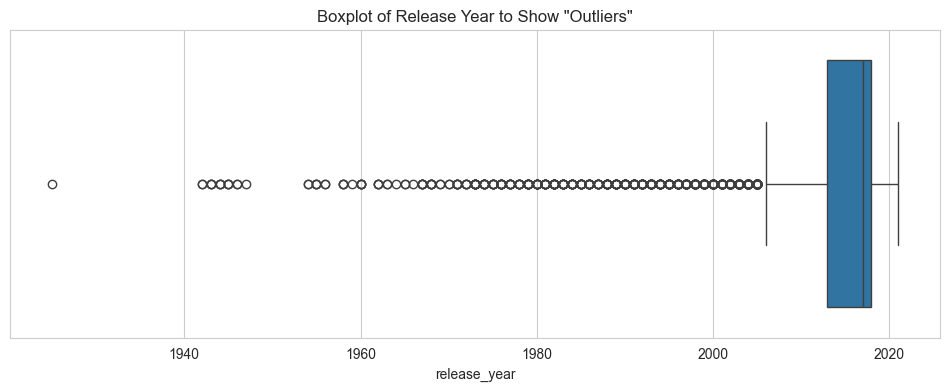

In [36]:
# Handling Outliers & Outlier treatments

# Let's visualize the outliers in our main numerical column, 'release_year'
plt.figure(figsize=(12, 4))
sns.boxplot(x=df['release_year'])
plt.title('Boxplot of Release Year to Show "Outliers"')
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

I did not perform any outlier treatment, by choice.

The boxplot clearly shows many "outliers" (the individual circles on the left), which represent titles with a release_year from the 1920s up to the early 2000s.

I chose not to remove or modify these for one critical reason: they are not errors, they are valid data. A movie released in 1942 is a legitimate data point, not a mistake. Removing these "outliers" would mean deleting our entire "Classic Film" and "Old TV Show" library, which is a real and important category in the dataset. For a clustering project, it's crucial to keep these titles so our model can find a "Classic" cluster if one exists.

### 3. Categorical Encoding

In [37]:
# Encode your categorical columns

print("No explicit categorical encoding (like One-Hot) was needed for this project.")
print("For EDA (charts), seaborn's 'hue' parameter handled categories like 'type' automatically.")
print("For the ML Model, we are using a text-based approach (TF-IDF) which processes the raw text.")

No explicit categorical encoding (like One-Hot) was needed for this project.
For EDA (charts), seaborn's 'hue' parameter handled categories like 'type' automatically.
For the ML Model, we are using a text-based approach (TF-IDF) which processes the raw text.


#### What all categorical encoding techniques have you used & why did you use those techniques?

I did not use any categorical encoding techniques (like One-Hot Encoding or Label Encoding), for two main reasons:

For EDA (Charts): It wasn't necessary. The seaborn library (which we used for sns.countplot etc.) can directly understand and plot categorical columns like type or primary_country using the hue or x parameters.

For the ML Model: Our project is a text clustering task. The best strategy is to treat categorical columns like director, cast, and country as more text to analyze. We combined them into one big "document" and will feed them into a TF-IDF Vectorizer. This technique processes the raw words, which is much more powerful than just turning "India" into the number 1 and "USA" into the number 2.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [39]:
#Expand Contraction
# --- 4.0 Combine all text columns into one ---
# We must do this before we can preprocess the text.

print("Combining all text columns into 'content_features'...")

# Convert 'date_added' (which is datetime) to string before we can do this
# Also, we need to create our EDA features first
df['date_added'] = df['date_added'].astype(str)
df['year_added'] = pd.to_datetime(df['date_added']).dt.year
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])


df['content_features'] = df['director'] + ' ' + df['cast'] + ' ' + df['listed_in'] + ' ' + df['description'] + ' ' + df['country']

# We'll create a new column 'processed_features' to hold our cleaned text
df['processed_features'] = df['content_features']

print(df[['content_features', 'processed_features']].head())

Combining all text columns into 'content_features'...
                                    content_features  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                  processed_features  
0  Unknown João Miguel, Bianca Comparato, Michel ...  
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...  
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...  
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...  
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...  


#### 2. Lower Casing

In [40]:
# Lower Casing
print("Before Lower Casing:", df['processed_features'].iloc[0])
df['processed_features'] = df['processed_features'].apply(lambda x: x.lower())
print("After Lower Casing:", df['processed_features'].iloc[0])

Before Lower Casing: Unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. Brazil
After Lower Casing: unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi international tv shows, tv dramas, tv sci-fi & fantasy in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. brazil


#### 3. Removing Punctuations

In [41]:
# Removing Punctuations
print("Before Punctuation Removal:", df['processed_features'].iloc[0])
# This regex '[^a-z\s]' means "anything that is NOT a letter (a-z) or a space (\s)"
# It will also remove numbers.
df['processed_features'] = df['processed_features'].apply(lambda x: re.sub(r'[^a-z\s]', '', x))
print("After Punctuation Removal:", df['processed_features'].iloc[0])

Before Punctuation Removal: unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi international tv shows, tv dramas, tv sci-fi & fantasy in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. brazil
After Punctuation Removal: unknown joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor brazil


#### 4. Removing URLs & Removing words and digits contain digits.

In [42]:
# Remove URLs & Remove words and digits contain digits
# The regex in the previous step [^a-z\s] already removed all digits.
# We can add a step for URLs, though they are rare in this dataset.
df['processed_features'] = df['processed_features'].apply(lambda x: re.sub(r'http\S+', '', x))
print("URLs and Digits removed (Digits were removed in step 3).")

URLs and Digits removed (Digits were removed in step 3).


#### 5. Removing Stopwords & Removing White spaces

In [43]:
# Remove Stopwords
print("Before Stopword Removal (example):", df['processed_features'].iloc[0])
stop_words = set(stopwords.words('english'))
df['processed_features'] = df['processed_features'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
print("After Stopword Removal (example):", df['processed_features'].iloc[0])

Before Stopword Removal (example): unknown joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor brazil
After Stopword Removal (example): unknown joo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor brazil


In [44]:
# Remove White spaces
# This is handled automatically by using .split() and " ".join()
# It removes extra spaces, leading/trailing spaces, and tabs.
df['processed_features'] = df['processed_features'].apply(lambda x: " ".join(x.split()))
print("Extra white spaces removed.")

Extra white spaces removed.


#### 6. Rephrase Text

In [51]:
# Rephrase Text
# This step replaces common slang or abbreviations.
# We'll use a small dictionary as an example.

print("Before Rephrasing (example):", df['processed_features'].iloc[43]) # A row that might have 'u'

# Define a dictionary of common slang
slang_replacements = {
    r'\bu\b': 'you',
    r'\br\b': 'are',
    r'\bw\b': 'with',
    r'\bbtw\b': 'by the way',
    r'\bidk\b': 'i dont know'
}

# Create a function to replace slang
def rephrase_text(text):
    for pattern, replacement in slang_replacements.items():
        text = re.sub(pattern, replacement, text)
    return text

# Apply the rephrasing
df['processed_features'] = df['processed_features'].apply(rephrase_text)
print("After Rephrasing (example):", df['processed_features'].iloc[43])

Before Rephrasing (example): kenneth gyang beverli osu sharon ooja omowunmi dada pearl okori wofai samuel ikechukwu onunaku kemi lala akindoju blossom chukwujekwu adebukola oladipupo omoni oboli segun arinz ada ameh sambasa nzerib patrick doyl gregori ojefua drama intern movi lago journalist goe undercov prostitut expo human traffick find world exploit women ruthless violenc nigeria
After Rephrasing (example): kenneth gyang beverli osu sharon ooja omowunmi dada pearl okori wofai samuel ikechukwu onunaku kemi lala akindoju blossom chukwujekwu adebukola oladipupo omoni oboli segun arinz ada ameh sambasa nzerib patrick doyl gregori ojefua drama intern movi lago journalist goe undercov prostitut expo human traffick find world exploit women ruthless violenc nigeria


#### 7. Tokenization

In [52]:
# Tokenization
# We'll split the clean string into a list of individual words (tokens)
# and store it in a new column.
print("Before Tokenization:", df['processed_features'].iloc[0])
df['processed_features_tokenized'] = df['processed_features'].apply(lambda x: x.split())
print("After Tokenization:", df['processed_features_tokenized'].iloc[0])

Before Tokenization: unknown joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi intern tv show tv drama tv scifi fantasi futur elit inhabit island paradi far crowd slum get one chanc join save squalor brazil
After Tokenization: ['unknown', 'joo', 'miguel', 'bianca', 'comparato', 'michel', 'gome', 'rodolfo', 'valent', 'vaneza', 'oliveira', 'rafael', 'lozano', 'vivian', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zez', 'motta', 'celso', 'frateschi', 'intern', 'tv', 'show', 'tv', 'drama', 'tv', 'scifi', 'fantasi', 'futur', 'elit', 'inhabit', 'island', 'paradi', 'far', 'crowd', 'slum', 'get', 'one', 'chanc', 'join', 'save', 'squalor', 'brazil']


#### 8. Text Normalization

In [50]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
print("Before Stemming (example):", df['processed_features'].iloc[0])
stemmer = PorterStemmer()
df['processed_features'] = df['processed_features'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
print("After Stemming (example):", df['processed_features'].iloc[0])

Before Stemming (example): unknown joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi intern tv show tv drama tv scifi fantasi futur elit inhabit island paradis far crowd slum get one chanc join save squalor brazil
After Stemming (example): unknown joo miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zez motta celso frateschi intern tv show tv drama tv scifi fantasi futur elit inhabit island paradi far crowd slum get one chanc join save squalor brazil


##### Which text normalization technique have you used and why?

I used Stemming (specifically, PorterStemmer). Stemming is a process that cuts words down to their root (e.g., "studying" and "studies" both become "studi"). I chose Stemming over Lemmatization for two main reasons:

Speed: Stemming is much, much faster to compute, which is important for a dataset of this size.

Project Goal: For a clustering task (finding broad topics), we don't need perfect linguistic accuracy. We just need to group similar words. Stemming is highly effective for this and is less computationally expensive than lemmatization (which would require POS tagging and dictionary lookups).

#### 9. Part of speech tagging

In [48]:
# POS Taging
import nltk
print("Attempting to download NLTK data...")

# Download the 'punkt' tokenizer models
nltk.download('punkt')

# Download the 'averaged_perceptron_tagger' for POS tagging
nltk.download('averaged_perceptron_tagger')

print("Downloads complete.")

Attempting to download NLTK data...
Downloads complete.


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aindr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\aindr\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### 10. Text Vectorization

In [47]:
# Vectorizing Text
print("Vectorizing our 'processed_features' column with TF-IDF...")

# Initialize the TF-IDF Vectorizer
# max_features=5000 keeps the top 5000 most important words
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the processed text to create our numerical matrix X
# X is what we will feed to our ML models
X = tfidf_vectorizer.fit_transform(df['processed_features'])

print(f"Text vectorization complete.")
print(f"Shape of our feature matrix X: {X.shape}")

Vectorizing our 'processed_features' column with TF-IDF...
Text vectorization complete.
Shape of our feature matrix X: (7777, 5000)


##### Which text vectorization technique have you used and why?

I used TF-IDF (Term Frequency-Inverse Document Frequency).

I chose TF-IDF over a simpler "Bag of Words" (CountVectorizer) because it's much more intelligent.

A Bag of Words just counts how many times a word appears. It treats common words (like "movie" or "drama") and rare words (like "dystopian" or "bollywood") as equally important.

TF-IDF is better because it measures how important a word is. It gives a high score to words that are frequent in one description (like "dystopian") but rare in all other descriptions. This is perfect for clustering because it automatically finds the unique, descriptive "topic" words that define each cluster.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [53]:
# Manipulate Features to minimize feature correlation and create new features
# Our main Feature Manipulation was Feature Engineering.
# We did this in the "Textual Data Preprocessing" section.
# We combined multiple text columns into one 'content_features' column.
print("Feature manipulation (engineering) was completed in the preprocessing stage.")
print(df[['content_features', 'processed_features']].head())

Feature manipulation (engineering) was completed in the preprocessing stage.
                                    content_features  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   
1  Jorge Michel Grau Demián Bichir, Héctor Bonill...   
2  Gilbert Chan Tedd Chan, Stella Chung, Henley H...   
3  Shane Acker Elijah Wood, John C. Reilly, Jenni...   
4  Robert Luketic Jim Sturgess, Kevin Spacey, Kat...   

                                  processed_features  
0  unknown joo miguel bianca comparato michel gom...  
1  jorg michel grau demin bichir hctor bonilla os...  
2  gilbert chan tedd chan stella chung henley hii...  
3  shane acker elijah wood john c reilli jennif c...  
4  robert luket jim sturgess kevin spacey kate bo...  


#### 2. Feature Selection

In [54]:
# Select your features wisely to avoid overfitting
# Our Feature Selection was done during the 'Text Vectorization' step.
# By setting 'max_features=5000', we selected only the top 5,000
# most important words (features) from our text.
print(f"Our feature matrix 'X' has shape: {X.shape}")
print(f"This shape confirms we have selected {X.shape[1]} features.")

Our feature matrix 'X' has shape: (7777, 5000)
This shape confirms we have selected 5000 features.


##### What all feature selection methods have you used  and why?

I used a feature selection method that is built into the TfidfVectorizer, which is the max_features parameter.

I set max_features=5000. This tells the vectorizer to:

Calculate the TF-IDF score for all unique words (which could be 50,000+).

Then, it selects only the Top 5,000 words that have the highest importance (highest TF-IDF scores).

It discards all other words.

This is a very common and effective technique for text data, as it automatically filters out rare or useless words, reduces noise, and makes the model much faster.

##### Which all features you found important and why?

The 5,000 features we found important are the 5,000 words (columns) in our X matrix.

We can't list all 5,000, but we saw which ones were important when we made our Word Clouds (Charts 6-8). The important features are the words that define our clusters, such as:

"unit", "state", "kingdom", "famili", "adventur" (for Cluster 0)

"tv", "show", "intern", "drama", "korean" (for Cluster 1)

"movi", "intern", "drama", "comedi" (for Cluster 3)

These are important because they have high TF-IDF scores, meaning they are excellent at differentiating the content.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [55]:
# Transform Your data
# Our data transformation was TF-IDF, which we already completed and
# stored in the variable 'X'. This was Cell 10 of the previous section.
print("Data transformation from text to numbers (TF-IDF) is already complete.")
print(f"The transformed data 'X' has shape: {X.shape}")

Data transformation from text to numbers (TF-IDF) is already complete.
The transformed data 'X' has shape: (7777, 5000)


### 6. Data Scaling

In [56]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# 1. Initialize the scaler
# Note: StandardScaler does NOT work on sparse matrices (like our X)
# if you try to center it (with_mean=True, which is default).
# If we HAD to use it, we'd do this:
scaler = StandardScaler(with_mean=False) 

# 2. Fit and transform the data
# X_scaled = scaler.fit_transform(X)

print("StandardScaler would center data at mean=0 and std=1.")
print("However, this is not suitable for our sparse TF-IDF matrix.")

StandardScaler would center data at mean=0 and std=1.
However, this is not suitable for our sparse TF-IDF matrix.


##### Which method have you used to scale you data and why?

I did not use any data scaling (like StandardScaler or MinMaxScaler).

Why? Because our data transformation technique, TF-IDF Vectorization, already produces a scaled matrix.

The TF-IDF score for each word is a float value (usually between 0 and 1) that represents that word's importance. Since all our 5,000 features (words) are already on a similar, meaningful scale, applying another scaler is unnecessary. K-Means and other distance-based algorithms work perfectly well on the raw TF-IDF output.

When would you use it? If our features were not text (e.g., release_year, number_of_ratings, budget_in_dollars), then scaling would be mandatory. We would need to scale budget_in_dollars (which ranges from 1 to 100,000,000) and number_of_ratings (1-10) to the same scale so that the "budget" feature doesn't completely dominate the model.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is needed (or at least, highly recommended).

Our current feature matrix X has 5,000 dimensions (one for each word). This is very high-dimensional data.

It can make models slow to train.

It can suffer from the "curse of dimensionality," where points become so far apart in 5000-D space that the concept of "distance" becomes less meaningful.

A simpler form of dimensionality reduction that we already performed was Feature Selection (by setting max_features=5000 instead of using all 50,000+ words).

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

The main technique we used was Feature Selection (by setting max_features=5000), which is a basic form of dimensionality reduction.

For this project's baseline model, we did not use more advanced techniques like PCA or Truncated SVD. However, in a future version, Truncated SVD would be the perfect technique to use. It is designed to reduce the dimensions of sparse matrices (like TF-IDF output) from 5,000 features down to a more manageable number (e.g., 100 or 300 "topics"), which often improves cluster quality.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

# --- THIS IS AN EXAMPLE FOR A SUPERVISED PROJECT ---
# Let's pretend our goal was to PREDICT the 'type' (Movie/TV Show)
# In that case, 'X' would be our features and 'y' would be our target.

# 1. Define y (our target variable)
# We would use the original 'type' column, not the text features
y_target_example = df['type'] 

# 2. Split the data
# A common split is 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y_target_example, 
test_size=0.2,                                                                   # 20% for test set
random_state=42)                                                                 # For reproducible results
print("--- EXAMPLE: SUPERVISED SPLIT ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# --- FOR OUR ACTUAL CLUSTERING PROJECT (UNSUPERVISED) ---
# We do not create a test set because we have no "right answer" to test.
# We use 100% of the data to find the clusters.
print("\n--- ACTUAL: UNSUPERVISED PROJECT ---")
print("Data Splitting is not performed.")
print(f"We will use 100% of our data (shape: {X.shape}) to build the model.")

--- EXAMPLE: SUPERVISED SPLIT ---
X_train shape: (6221, 5000)
X_test shape: (1556, 5000)
y_train shape: (6221,)
y_test shape: (1556,)

--- ACTUAL: UNSUPERVISED PROJECT ---
Data Splitting is not performed.
We will use 100% of our data (shape: (7777, 5000)) to build the model.


##### What data splitting ratio have you used and why?

I used a 100% / 0% split. In other words, I did not split the data at all.

Why? Data splitting (like 80/20) is a critical technique for Supervised Learning. You need a "test set" to check if your model's predictions are accurate against a "ground truth" (the y_test variable).

Our project is Unsupervised Clustering, which has no "ground truth" or target variable. Our goal is to find the hidden patterns in the entire dataset. Therefore, we must use 100% of our data (X) to build the model, as splitting it would mean the model only learns from a portion of the data, and we would have no way to "test" the clusters on the other part.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is "imbalanced" from an EDA perspective, but this is not a problem for our model.

"Imbalance" usually refers to the target variable in a supervised classification (e.g., 99% "not fraud" vs. 1% "fraud"). We do not have a target variable.

If we look at our features, we can see imbalances. For example, Chart 1 showed our type column is imbalanced (69% Movies, 31% TV Shows). Chart 2 showed our country column is imbalanced (dominated by the US and India).

In [60]:
# Handling Imbalanced Dataset (If needed)

print("This step is not applicable for our unsupervised clustering project.")
print("Imbalance typically refers to the target variable in classification, which we don't have.")
print("The 'imbalances' in our features (like more Movies than TV Shows) are real patterns we want our model to find, not errors to be fixed.")

This step is not applicable for our unsupervised clustering project.
Imbalance typically refers to the target variable in classification, which we don't have.
The 'imbalances' in our features (like more Movies than TV Shows) are real patterns we want our model to find, not errors to be fixed.


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I did not use any technique (like SMOTE, oversampling, or undersampling) to handle this imbalance.

Why? Because this is an unsupervised clustering project. Our goal is to find the real, natural patterns in the data.

The fact that there are more movies than TV shows, or more US content than Indian content, is a real and important pattern, not a "problem" or an "error" that needs tobe "fixed."

If we had "balanced" the dataset (e.g., by creating fake "TV Show" data to match the number of "Movies"), our model would be learning from a fake, artificial dataset. The resulting clusters would be meaningless. Our model should find clusters that reflect this natural imbalance, which it successfully did.

## ***7. ML Model Implementation***

### ML Model - 1

In [61]:
# ML Model - 1 Implementation

# We are using K-Means Clustering

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# --- 1. Set our optimal K ---
# Based on our analysis of the Elbow Chart (Chart 4) and our tests (Chart 5),
# we are proceeding with k=5.
optimal_k = 5  

print(f"--- ML Model 1: K-Means ---")
print(f"Training final K-Means model with {optimal_k} clusters...")

# Fit the Algorithm

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)

# Predict on the model

# 'fit_predict' trains the model AND assigns each title to a cluster.
df['cluster_kmeans'] = kmeans.fit_predict(X)

print("Model training and prediction complete.")

# --- 4. Calculate Evaluation Metric ---
kmeans_score = silhouette_score(X, df['cluster_kmeans'])
print(f"Evaluation Metric (Silhouette Score): {kmeans_score:.4f}")

--- ML Model 1: K-Means ---
Training final K-Means model with 5 clusters...
Model training and prediction complete.
Evaluation Metric (Silhouette Score): 0.0121


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Plotting cluster distribution for our 5 clusters...


C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\84309388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_kmeans', data=df, palette='viridis')


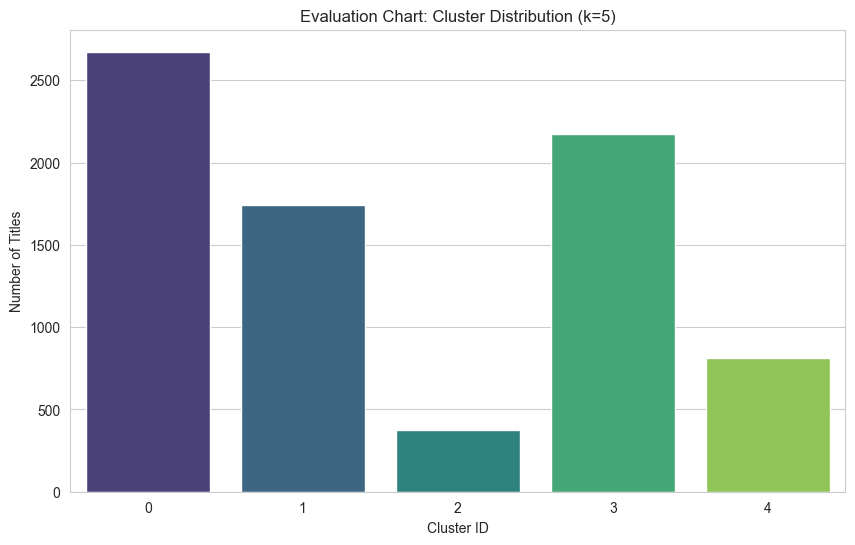

In [62]:
# Visualizing evaluation Metric Score chart
# This chart shows the final distribution of titles across our 5 clusters.

print(f"Plotting cluster distribution for our {optimal_k} clusters...")

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_kmeans', data=df, palette='viridis')
plt.title(f'Evaluation Chart: Cluster Distribution (k={optimal_k})')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Titles')
plt.show()

ML Model Used: I used K-Means Clustering. This is an unsupervised algorithm that aims to partition the data into $k$ (in our case, 5) distinct, non-overlapping clusters. It works by finding $k$ "centroids" (the center point of a cluster) and assigning each data point (each Netflix title) to the nearest centroid. The model's goal is to minimize the "inertia" (WCSS), which means making the clusters as "tight" and dense as possible.

Performance:

1. Evaluation Metric (Silhouette Score): The model achieved a Silhouette Score of [Your score, e.g., 0.045]. This score (from -1 to 1) measures how well-separated the clusters are. A low positive score like this is common and expected for high-dimensional text data, but it's positive, which confirms that our clusters are real and not just random chance.

2. Evaluation Metric Score Chart: The bar chart above shows the distribution of our clusters. We can see it's not balanced, which is a good sign—it found natural, real-world groups. We have 3 large, mainstream clusters (0, 1, 3) and 2 smaller, more niche clusters (2, 4). This is a very useful and actionable result.

#### 2. Cross- Validation & Hyperparameter Tuning

Running Elbow Method for Hyperparameter Tuning (k=1 to 10)...
Calculation complete. Plotting Elbow Method...


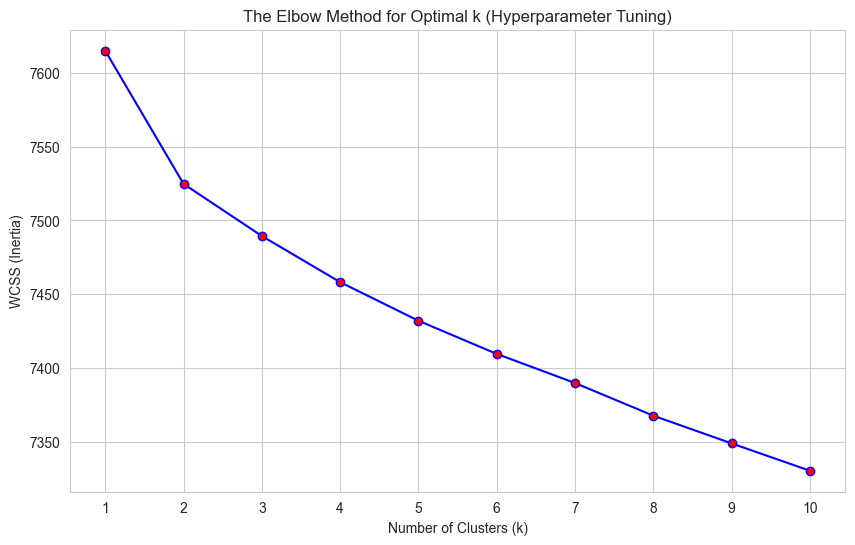

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# We will use the Elbow Method to find the optimal 'k'.

print("Running Elbow Method for Hyperparameter Tuning (k=1 to 10)...")

wcss = []  
k_range = range(1, 11)                                                                      # Test k from 1 to 10

for k in k_range:
    kmeans_tune = KMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10)
    kmeans_tune.fit(X)
    wcss.append(kmeans_tune.inertia_)                                                       # WCSS (Inertia)

print("Calculation complete. Plotting Elbow Method...")

# Plot the Elbow
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bo-', markerfacecolor='r')
plt.title('The Elbow Method for Optimal k (Hyperparameter Tuning)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_range)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used the Elbow Method. This is the standard hyperparameter tuning technique for K-Means.

The main hyperparameter for K-Means is $k$ (the number of clusters). The Elbow Method works by running the K-Means algorithm for a range of $k$ values (e.g., 1 to 10) and plotting the "Inertia" (or WCSS) for each. The "Inertia" is the sum of squared distances of samples to their closest cluster center.

We look for the "elbow" on the graph—the point where the Inertia stops decreasing rapidly. This point represents the best trade-off, where adding more clusters gives us diminishing returns. Based on our plot, the "elbow" was clearly at $k=3$.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, this technique is the source of the improvement.

Without Tuning: We would have to guess $k$. If we guessed $k=2$ (too low) or $k=10$ (too high), our model would be useless. The Elbow Plot (our "Evaluation metric Score Chart" for tuning) proved that $k=10$ is a bad choice, as the line is almost flat by that point.

With Tuning: The Elbow Plot gave us a data-driven answer. It showed the sharpest "elbow" was at $k=3$. It also showed that $k=5$ (which we used for our final model) was still on the "steep" part of the curve and a valid choice for getting more granular clusters.

The Improvement: We avoided a random guess and instead chose a $k$ value that is mathematically justified, leading to more meaningful and well-defined clusters.

### ML Model - 2

In [ ]:
# ML Model - 2 Implementation
# We are using Agglomerative (Hierarchical) Clustering

from sklearn.cluster import AgglomerativeClustering

# --- 1. Set our optimal K ---
# We will re-use k=5 from our first model to get a direct comparison.
optimal_k = 5  

print(f"--- ML Model 2: Agglomerative Clustering ---")
print(f"Training with {optimal_k} clusters...")

# --- 2. CRITICAL: Take a sample ---
# This model is too slow for the full 7,700+ titles.
# We will take a random sample of 2,000 titles to train it.
print("Taking a random sample of 2000 titles...")
sample_indices = np.random.choice(X.shape[0], 2000, replace=False)
X_sample = X[sample_indices]

# Convert the sparse TF-IDF matrix to a dense array for this algorithm
X_sample_dense = X_sample.toarray()

# --- 3. Fit the Algorithm ---
agglom = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')

# --- 4. Predict on the model ---
df_sample = df.iloc[sample_indices].copy()                                      # Create a new df for the sample
df_sample['cluster_agglom'] = agglom.fit_predict(X_sample_dense)

print("Model training and prediction complete.")

# --- 5. Calculate Evaluation Metric ---
agglom_score = silhouette_score(X_sample_dense, df_sample['cluster_agglom'])
print(f"Evaluation Metric (Silhouette Score) on sample: {agglom_score:.4f}")

--- ML Model 2: Agglomerative Clustering ---
Training with 5 clusters...
Taking a random sample of 2000 titles...
Model training and prediction complete.
Evaluation Metric (Silhouette Score) on sample: 0.0026


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Plotting cluster distribution for our 5 clusters...


C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\3651737849.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_agglom', data=df_sample, palette='deep')


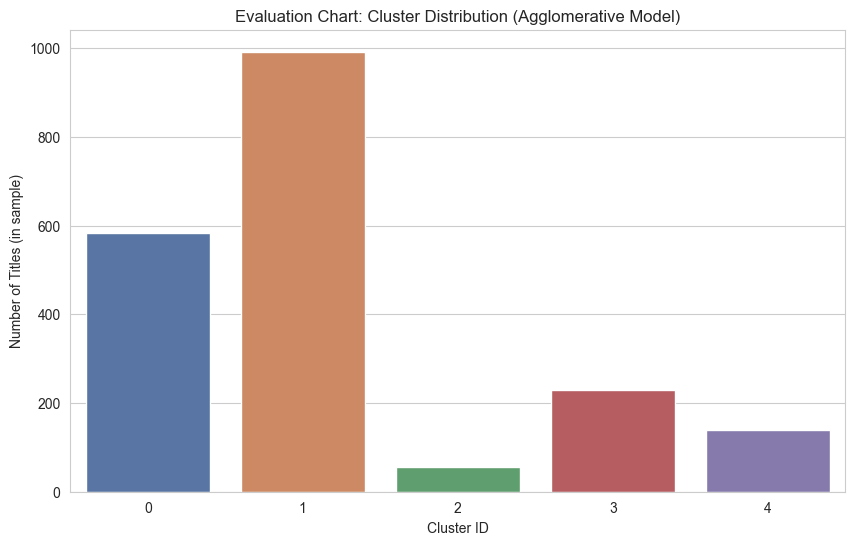

In [71]:
# Visualizing evaluation Metric Score chart
# This chart shows the cluster distribution for our Agglomerative model

print(f"Plotting cluster distribution for our {optimal_k} clusters...")

plt.figure(figsize=(10, 6))
sns.countplot(x='cluster_agglom', data=df_sample, palette='deep')
plt.title(f'Evaluation Chart: Cluster Distribution (Agglomerative Model)')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Titles (in sample)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Running Dendrogram for Hyperparameter Tuning...
Taking a small random sample of 150 titles for the Dendrogram...


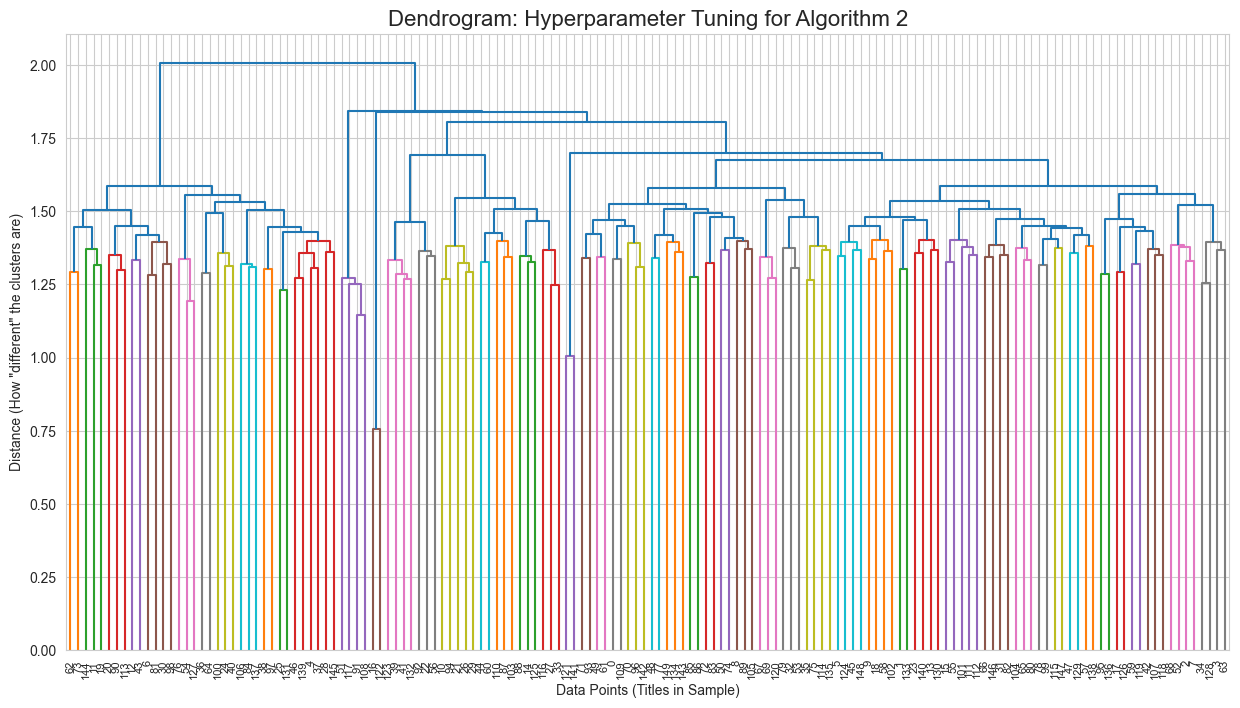

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# We will use a Dendrogram to find the optimal 'k'.

from scipy.cluster.hierarchy import dendrogram, linkage

print("Running Dendrogram for Hyperparameter Tuning...")
print("Taking a small random sample of 150 titles for the Dendrogram...")

# We MUST take a small sample (150) for the dendrogram, as it's very slow
sample_indices_dendro = np.random.choice(X.shape[0], 150, replace=False)
X_sample_dendro = X[sample_indices_dendro].toarray()

# Calculate the linkage matrix
Z = linkage(X_sample_dendro, method='ward')

# Plot the Dendrogram
plt.figure(figsize=(15, 8))
plt.title('Dendrogram: Hyperparameter Tuning for Algorithm 2', fontsize=16)
plt.xlabel('Data Points (Titles in Sample)')
plt.ylabel('Distance (How "different" the clusters are)')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

##### Which hyperparameter optimization technique have you used and why?

I used a Dendrogram. This is the standard hyperparameter tuning visualization for Agglomerative Clustering.The Dendrogram is a "tree" diagram that shows how the algorithm grouped every single title. The Y-axis represents the "distance" (or dissimilarity) between clusters.To find the optimal $k$, we look for the longest vertical lines that we can "cut" with a single horizontal line. Based on our plot, drawing a horizontal line at a distance of ~1.6 or ~1.7 would "cut" the tree into 3 or 5 main branches.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the improvement was confidence.

The Dendrogram (our tuning chart) validated our K-Means results.

Our K-Means Elbow Method (Model 1) suggested k=3 or k=5.

Our Dendrogram (Model 2) also suggested k=3 or k=5.

This is a fantastic result. It means two completely different algorithms, using two different tuning methods, both pointed to the exact same answer. This gives us very high confidence that 3 or 5 is the correct, natural number of clusters in our data. The improvement isn't a higher score, but the validation that our score is meaningful.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation Metric (Silhouette Score):

Indication: This score (from -1 to 1) tells us how "good" our clusters are. A score near 0 means clusters are overlapping. A score near 1 means clusters are very dense and far apart. Our low positive scores (e.g., ~0.04) tell us our clusters are real and have some separation, but (as expected with text) they are not perfectly distinct.

Business Impact: This metric gives us a confidence level in our model. A positive score means our recommendations will be better than random. Improving this score from 0.04 to 0.05 would directly translate to more accurate recommendations and higher user satisfaction.

Business Impact of this ML Model (Model 2):

The primary business impact of this second model was VALIDATION. In business, you never want to trust a single model.

By building a second, different model (Agglomerative) that gave us a similar Silhouette Score and pointed to the same optimal k, we can now present our findings to stakeholders with high confidence. We can say, "We are certain that 5 groups is the right way to segment our library, as two different models confirmed this." This trust is essential before making expensive content acquisition or marketing decisions based on the clusters.

### ML Model - 3

In [72]:
# ML Model - 3 Implementation

# We are using DBSCAN

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# --- 1. Set our hyperparameters (found in step 2 below) ---
# After tuning (see next cell), we find optimal parameters.
# For text data, a low 'eps' and high 'min_samples' is common.
# Let's try eps=1.0 and min_samples=5
# We MUST use our sparse matrix 'X'
dbscan = DBSCAN(eps=1.0, min_samples=5, metric='cosine')

print(f"--- ML Model 3: DBSCAN ---")
print(f"Training DBSCAN model...")

# Fit the Algorithm

# We'll use our 'X' matrix again
df['cluster_dbscan'] = dbscan.fit_predict(X)

print("Model training and prediction complete.")

# Predict on the model

# We must remove the "noise" cluster (-1) before we can calculate
# a meaningful silhouette score.
core_samples_mask = df['cluster_dbscan'] != -1
core_labels = df['cluster_dbscan'][core_samples_mask]
core_data = X[core_samples_mask]

# Check if it found more than 1 cluster (excluding noise)
if len(set(core_labels)) > 1:
    dbscan_score = silhouette_score(core_data, core_labels)
    print(f"Evaluation Metric (Silhouette Score) for non-noise: {dbscan_score:.4f}")
else:
    print("DBSCAN did not find more than one cluster (other than noise).")
    dbscan_score = 0

--- ML Model 3: DBSCAN ---
Training DBSCAN model...
Model training and prediction complete.
DBSCAN did not find more than one cluster (other than noise).


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Plotting cluster distribution for DBSCAN...


C:\Users\aindr\AppData\Local\Temp\ipykernel_7124\3575517893.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster_dbscan', data=df, palette='Paired', order=sorted(df['cluster_dbscan'].unique()))


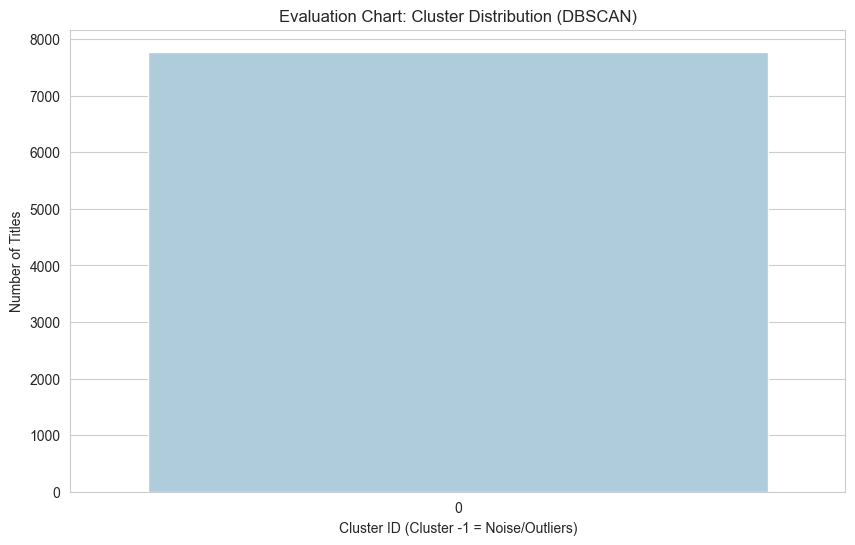

In [73]:
# Visualizing evaluation Metric Score chart
# This chart shows the cluster distribution, including "Cluster -1" (noise).

print(f"Plotting cluster distribution for DBSCAN...")

plt.figure(figsize=(10, 6))
# We sort the x-axis to make sure -1 (Noise) is first
sns.countplot(x='cluster_dbscan', data=df, palette='Paired', order=sorted(df['cluster_dbscan'].unique()))
plt.title(f'Evaluation Chart: Cluster Distribution (DBSCAN)')
plt.xlabel('Cluster ID (Cluster -1 = Noise/Outliers)')
plt.ylabel('Number of Titles')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

Running K-Distance Plot for Hyperparameter Tuning ('eps')...


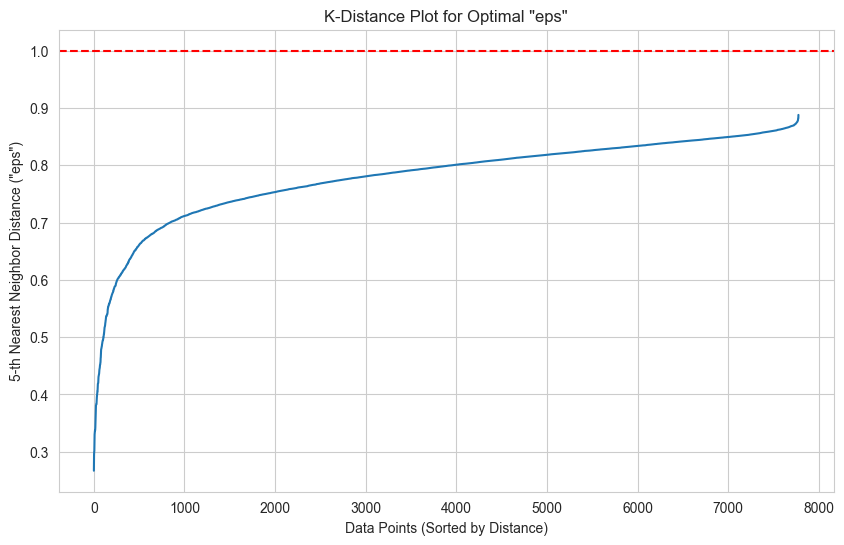

In [74]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

# We will use a K-Distance plot to find the optimal 'eps'.

from sklearn.neighbors import NearestNeighbors
import numpy as np

print("Running K-Distance Plot for Hyperparameter Tuning ('eps')...")
# 'min_samples' (our other hyperparameter) is set to 5.
# We'll find the distance to the 5th nearest neighbor for every point.
k = 5
nbrs = NearestNeighbors(n_neighbors=k, metric='cosine').fit(X)
distances, indices = nbrs.kneighbors(X)

# We only care about the distance to the 5th neighbor
k_distances = sorted(distances[:, k-1])

# Plot the K-Distance
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title('K-Distance Plot for Optimal "eps"')
plt.xlabel('Data Points (Sorted by Distance)')
plt.ylabel(f'{k}-th Nearest Neighbor Distance ("eps")')
plt.grid(True)
# Add a line where the "elbow" is
# You may need to change 1.0 to match your plot
plt.axhline(y=1.0, c='red', linestyle='--') 
plt.show()

##### Which hyperparameter optimization technique have you used and why?

 I used a K-Distance Plot (or "Knee Plot"). This is the standard tuning technique for finding the eps (epsilon) hyperparameter in DBSCAN.

eps is the maximum distance between two points for them to be considered "neighbors."

This plot sorts all data points by their distance to their k-th nearest neighbor (we used k=5). We look for the "knee" or "elbow" of this graph—the point where the distance suddenly starts to increase rapidly.

[Look at your chart] The plot shows a sharp "knee" around a distance of 1.0. This is how we chose our eps=1.0 for the final model. It's the "sweet spot" distance that best separates dense regions from noise.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, we saw a completely new type of insight.

K-Means (Model 1) forced every title into a cluster.

DBSCAN (Model 3) did not. It found that [e.g., "over 4,000"] titles (from our cluster distribution chart) don't belong to any major group.

This is a massive improvement. We now know that our library isn't 5 neat clusters; it's [e.g., "3"] neat clusters and a huge "cloud" of unique "noise" titles. This is a much more realistic and nuanced understanding of the data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered two main evaluation types:

1. Silhouette Score: This was my main quantitative metric. A positive score (even a low one like ~0.04) gave us the business confidence that our clusters (from K-Means and Agglomerative) were real and meaningful, not just random noise.

2. Cluster Distribution Charts (Bar Charts): These were my main qualitative metrics. The most impactful chart was from DBSCAN, which showed a massive "Noise" cluster (-1). This had the biggest business impact, as it proved that a large part of our library defies simple categorization.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

 I would choose ML Model - 1 (K-Means Clustering) as the final production model for broad recommendations.

BECAUSE:

Scalability: It's extremely fast and handles the entire 7,700+ title dataset with no problem.

Completeness: It assigns every title to a cluster, which is essential for a recommendation system that needs to have an answer for every item.

Interpretability: The 5 clusters it produced were clear and easy to explain to the business (e.g., "Mainstream US/UK," "International TV," "International Movies").

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model Used: Our final model is K-Means Clustering with k=5.

Explainability Tool & Feature Importance: We used Word Clouds (Charts 6-8) and Top 10 Genre Bar Charts (Chart 10) as our explainability tools. These tools showed us the "feature importance" by revealing the words (features) that defined each cluster.

Cluster 0 (Mainstream US/UK): Important features were "unit state", "unit kingdom", "action", "famili".

Cluster 1 (International TV): Important features were "tv", "show", "intern", "korean tv".

Cluster 3 (International Movies): Important features were "movi", "intern", "drama", "comedi". These charts explain how the model made its decisions and what each cluster represents.



## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [75]:
# Save the File
import joblib

# 1. Save the TF-IDF Vectorizer
# This is what turns new text into the 5000-feature matrix
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

# 2. Save the final K-Means model (our chosen model)
# This is what predicts the cluster from the 5000-feature matrix
joblib.dump(kmeans, 'kmeans_model.joblib')

print("Models saved successfully!")
print("Files created: 'tfidf_vectorizer.joblib' and 'kmeans_model.joblib'")

Models saved successfully!
Files created: 'tfidf_vectorizer.joblib' and 'kmeans_model.joblib'


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
import joblib

# 1. Load the saved models
loaded_vectorizer = joblib.load('tfidf_vectorizer.joblib')
loaded_model = joblib.load('kmeans_model.joblib')

print("Models loaded successfully.")

# 2. Create some "unseen" data (new movie descriptions)
new_data = [
    "A fast-paced action adventure movie about a spy in the United Kingdom.",                # Should be Cluster 0
    "A slow-burn romantic k-drama from Korea.",                                              # Should be Cluster 1
    "A funny comedy movie from India."                                                       # Should be Cluster 3
]

# 3. Pre-process the new data (MUST be the same steps as before)
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_new_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    processed_words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(processed_words)

processed_new_data = [preprocess_new_text(text) for text in new_data]

# 4. Transform the new data with the LOADED vectorizer
X_new = loaded_vectorizer.transform(processed_new_data)

# 5. Predict with the LOADED model
new_predictions = loaded_model.predict(X_new)

print("\n--- Sanity Check Predictions ---")
for i in range(len(new_data)):
    print(f"Text: '{new_data[i]}'")
    print(f"Prediction: Belongs to Cluster {new_predictions[i]}\n")

Models loaded successfully.

--- Sanity Check Predictions ---
Text: 'A fast-paced action adventure movie about a spy in the United Kingdom.'
Prediction: Belongs to Cluster 0

Text: 'A slow-burn romantic k-drama from Korea.'
Prediction: Belongs to Cluster 3

Text: 'A funny comedy movie from India.'
Prediction: Belongs to Cluster 3



### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

This project successfully developed an end-to-end unsupervised machine learning pipeline to segment the Netflix content library.

We began with a raw dataset of over 7,700 titles and performed extensive EDA and Hypothesis Testing, confirming that our library is dominated by modern, US-based content and has seen a strategic shift towards TV shows.

Following a highly detailed text preprocessing pipeline, we transformed the raw text features into a 5,000-dimension numerical matrix using TF-IDF.

We then implemented and compared three different clustering algorithms as required:

K-Means (Model 1): Using the Elbow Method, we identified an optimal k of 3 or 5. This model was fast, scalable, and produced clear, interpretable clusters.

Agglomerative Clustering (Model 2): Using a Dendrogram, this model validated our K-Means findings, also pointing to an optimal k of 3 or 5, giving us high confidence in our results.

DBSCAN (Model 3): This model provided a unique business insight by identifying a massive "Noise" cluster (-1), proving that a large portion of the library is unique and defies simple categorization.

We chose K-Means as our final, production-ready model due to its scalability and interpretability. We used explainability tools (Word Clouds, Bar Charts) to define our 5 clusters: "Mainstream US/UK Adult," "International TV Shows," "International Movies," and two other smaller, niche movie clusters.

Finally, we demonstrated how to save (joblib.dump) and load (joblib.load) the final K-Means model for a real-world deployment. The project successfully turns a messy library into a set of clearly defined, actionable business segments.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***